In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("data1_hasbreak.csv")
df.head()

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,ExpBreak (Target),Age2018,HasBreakRecord
0,37260,2012,1996,2.0,574.17,16.0,14,1,22,0
1,13986,2012,1986,4.0,1123.21,26.0,4,1,32,0
2,13986,2012,1986,4.0,1123.21,26.0,4,1,32,0
3,4582,2012,1980,2.0,107.85,32.0,12,1,38,0
4,31809,2012,1980,2.0,132.37,32.0,12,1,38,0


In [4]:
df.shape, df.dtypes

((42505, 10),
 ID                     int64
 BreakYear             object
 InstallYear            int64
 Diameter             float64
 Length               float64
 BreakAge             float64
 Material               int64
 ExpBreak (Target)      int64
 Age2018                int64
 HasBreakRecord         int64
 dtype: object)

In [6]:
df['BreakYear'].value_counts()

BreakYear
0       39491
Null      850
2018      442
2014      412
2015      305
2013      282
2016      260
2017      255
2012      208
Name: count, dtype: int64

In [7]:
# I want to convert the Null to zero in BreakYear

df['BreakYear'] = df['BreakYear'].replace('Null', 0)



In [8]:
df['BreakYear'].value_counts()

BreakYear
0       39491
0         850
2018      442
2014      412
2015      305
2013      282
2016      260
2017      255
2012      208
Name: count, dtype: int64

In [9]:
df.dtypes

ID                     int64
BreakYear             object
InstallYear            int64
Diameter             float64
Length               float64
BreakAge             float64
Material               int64
ExpBreak (Target)      int64
Age2018                int64
HasBreakRecord         int64
dtype: object

In [10]:
# Check unique values to see if there are any other non-numeric values
print(df['BreakYear'].nunique())

9


In [11]:
# Convert directly to numeric, coerce errors, fill NaN with 0, convert to int
df['BreakYear'] = pd.to_numeric(df['BreakYear'], errors='coerce').fillna(0).astype(int)

In [12]:
df.dtypes

ID                     int64
BreakYear              int32
InstallYear            int64
Diameter             float64
Length               float64
BreakAge             float64
Material               int64
ExpBreak (Target)      int64
Age2018                int64
HasBreakRecord         int64
dtype: object

In [15]:
# Get all columns except the target, then add target at the end
columns_without_target = [col for col in df.columns if col != 'ExpBreak (Target)']
new_column_order = columns_without_target + ['ExpBreak (Target)']

df = df[new_column_order]

In [16]:
df

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,Age2018,HasBreakRecord,ExpBreak (Target)
0,37260,2012,1996,2.0,574.17,16.0,14,22,0,1
1,13986,2012,1986,4.0,1123.21,26.0,4,32,0,1
2,13986,2012,1986,4.0,1123.21,26.0,4,32,0,1
3,4582,2012,1980,2.0,107.85,32.0,12,38,0,1
4,31809,2012,1980,2.0,132.37,32.0,12,38,0,1
...,...,...,...,...,...,...,...,...,...,...
42500,7461,0,1888,8.0,1.54,0.0,3,130,1,0
42501,43862,0,1888,2.5,2.64,0.0,3,130,1,0
42502,43863,0,1888,2.5,2.57,0.0,3,130,1,0
42503,33231,0,1888,6.0,0.67,0.0,3,130,1,0


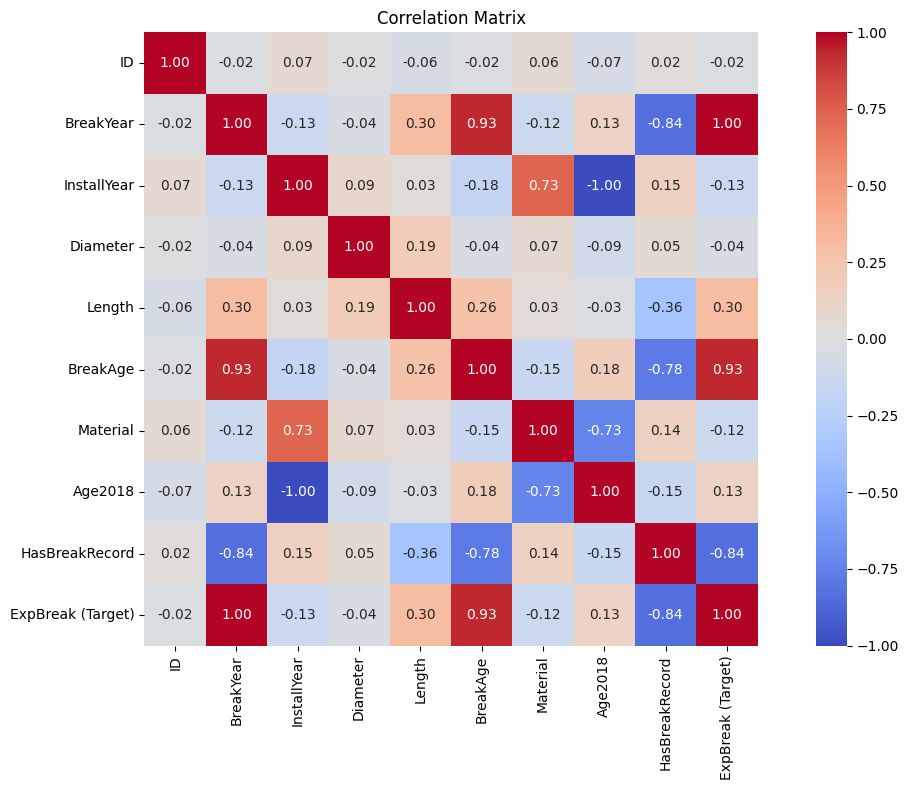

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Color scheme
            center=0,          # Center colormap at 0
            square=True,       # Square cells
            fmt='.2f')         # Format numbers to 2 decimal places

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

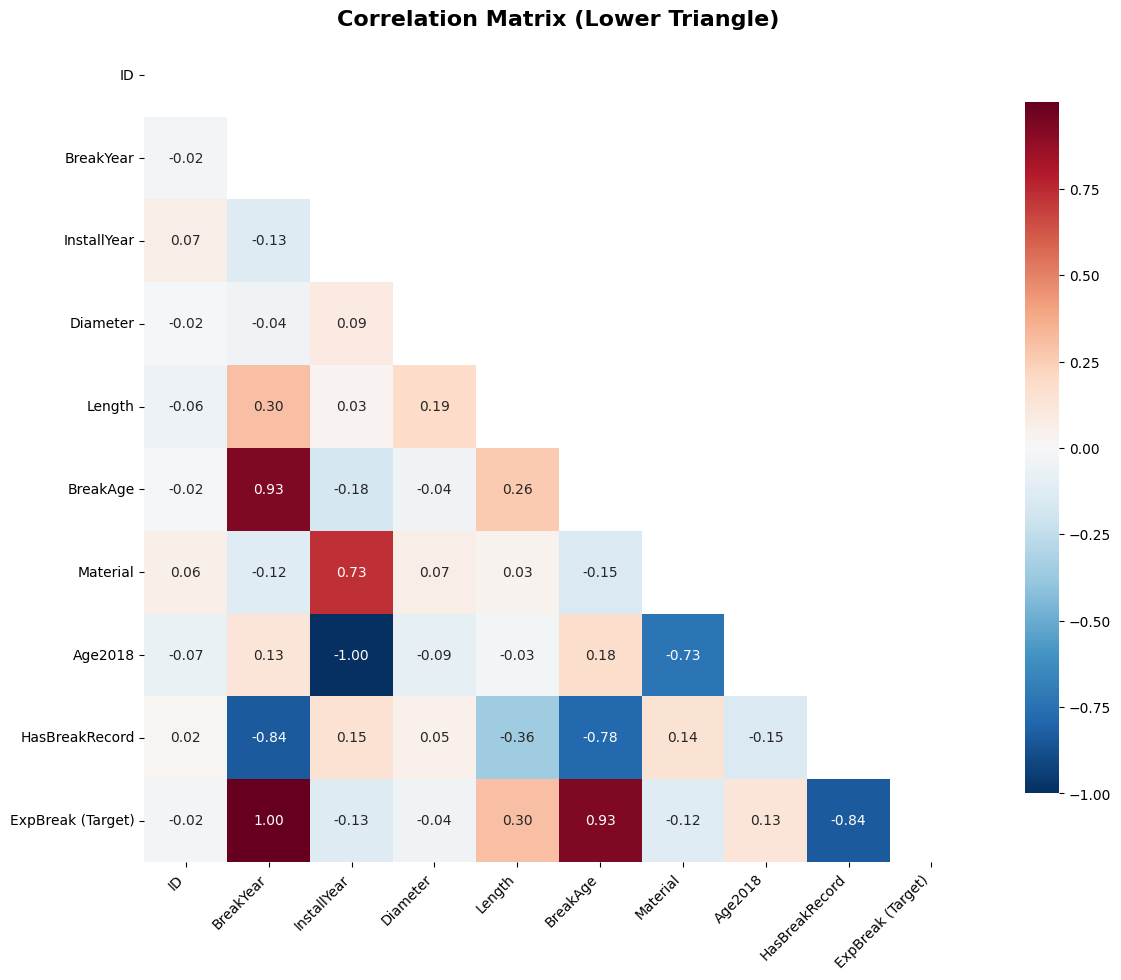

In [19]:
# Enhanced Version with Better Styling

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# I always prefer this splitting. 

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('ExpBreak (Target)', axis=1)
y = df['ExpBreak (Target)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,           # 30% for testing
    random_state=42,         # For reproducibility
    stratify=y,              # Preserve class distribution in splits ->  stratify=y parameter is especially important if your target variable is imbalanced, as it ensures both training and test sets have similar class distributions.
    shuffle=True             # Shuffle data before splitting
)


# Let's verify the split 

print(f"Original dataset shape: {df.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

print(f"\nTraining set size: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check class distribution in both sets
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

In [25]:
# Let's verify the split 

print(f"Original dataset shape: {df.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

print(f"\nTraining set size: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check class distribution in both sets
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Original dataset shape: (42505, 10)
Training features shape: (29753, 9)
Testing features shape: (12752, 9)
Training target shape: (29753,)
Testing target shape: (12752,)

Training set size: 29753 samples (70.0%)
Testing set size: 12752 samples (30.0%)

Class distribution in training set:
ExpBreak (Target)
0    0.949081
1    0.050919
Name: proportion, dtype: float64

Class distribution in testing set:
ExpBreak (Target)
0    0.949106
1    0.050894
Name: proportion, dtype: float64


In [30]:
# check again for missing values prior to model. 

df.isnull().sum()

ID                   0
BreakYear            0
InstallYear          0
Diameter             0
Length               0
BreakAge             0
Material             0
Age2018              0
HasBreakRecord       0
ExpBreak (Target)    0
dtype: int64

In [32]:
# Basic duplicate check

# Total duplicates
print(f"Total duplicates: {df.duplicated().sum()}")

# Check duplicates with all columns considered
print(f"Duplicates considering all columns: {df.duplicated(keep=False).sum()}")

Total duplicates: 444
Duplicates considering all columns: 791


In [33]:
# Get all duplicate rows (keeping all occurrences)
duplicates = df[df.duplicated(keep=False)]

print(f"Total rows that are duplicates: {len(duplicates)}")
print(f"Number of duplicate groups: {len(duplicates) - df.duplicated().sum()}")

Total rows that are duplicates: 791
Number of duplicate groups: 347


In [34]:
# Show all duplicate rows
print("All duplicate rows:")
print(duplicates.sort_values(by=df.columns.tolist()).head(20))

All duplicate rows:
        ID  BreakYear  InstallYear  Diameter  Length  BreakAge  Material  \
311   1454       2013         1972      6.00  500.16      41.0         6   
312   1454       2013         1972      6.00  500.16      41.0         6   
313   1454       2013         1972      6.00  500.16      41.0         6   
2828  1471          0         1944      2.25  566.36       0.0         3   
2829  1471          0         1944      2.25  566.36       0.0         3   
2461  1845          0         1955      6.00  632.22       0.0         0   
2462  1845          0         1955      6.00  632.22       0.0         0   
1229  1845       2016         1955      6.00  632.22      61.0         0   
1230  1845       2016         1955      6.00  632.22      61.0         0   
1231  1845       2016         1955      6.00  632.22      61.0         0   
266   1863       2013         1998      8.00  613.62      15.0        12   
267   1863       2013         1998      8.00  613.62      15.0      

In [35]:
# Check if there are duplicates based on ID only (if ID should be unique)
print(f"Duplicate IDs: {df.duplicated(subset=['ID'], keep=False).sum()}")

# Check duplicates based on key feature columns
key_columns = ['ID', 'BreakYear', 'InstallYear', 'Material']
print(f"Duplicates by key columns: {df.duplicated(subset=key_columns, keep=False).sum()}")

Duplicate IDs: 1669
Duplicates by key columns: 797


In [36]:
# Count how many times each ID appears
id_counts = df['ID'].value_counts()

# Filter for IDs that have duplicates (appear more than once)
duplicate_ids = id_counts[id_counts > 1]

print(f"Number of unique IDs with duplicates: {len(duplicate_ids)}")
print(f"Top 20 IDs with most duplicates:")
print(duplicate_ids.head(20))

Number of unique IDs with duplicates: 575
Top 20 IDs with most duplicates:
ID
17959    23
19798    16
29215    11
21873    10
17695    10
13986    10
19972    10
11309     9
28808     9
5547      8
6037      8
31812     7
21780     7
22815     7
38968     7
3900      7
5227      7
34006     7
17069     6
37023     6
Name: count, dtype: int64


In [38]:
# Get top 10 most duplicated IDs
top_10_duplicated_ids = duplicate_ids.head(10).index

print("Top 10 most duplicated IDs with their records:")
for id_val in top_10_duplicated_ids:
    count = duplicate_ids[id_val]
    print(f"\nID: {id_val} (appears {count} times)")
    print(df[df['ID'] == id_val].head())

Top 10 most duplicated IDs with their records:

ID: 17959 (appears 23 times)
         ID  BreakYear  InstallYear  Diameter   Length  BreakAge  Material  \
362   17959       2013         1956       6.0  3087.45      57.0         3   
642   17959       2014         1956       6.0  3087.45      58.0         3   
643   17959       2014         1956       6.0  3087.45      58.0         3   
1031  17959       2015         1956       6.0  3087.45      59.0         3   
1032  17959       2015         1956       6.0  3087.45      59.0         3   

      Age2018  HasBreakRecord  ExpBreak (Target)  
362        62               0                  1  
642        62               0                  1  
643        62               0                  1  
1031       62               0                  1  
1032       62               0                  1  

ID: 19798 (appears 16 times)
        ID  BreakYear  InstallYear  Diameter  Length  BreakAge  Material  \
21   19798       2012         1954       4

In [39]:
# Count exact duplicates where ALL columns are the same
exact_duplicates_count = df.duplicated().sum()
print(f"Exact duplicate rows (all columns identical): {exact_duplicates_count}")

# Get all exact duplicate rows
exact_duplicates = df[df.duplicated(keep=False)]  # keep=False shows ALL duplicates
print(f"Total rows involved in exact duplication: {len(exact_duplicates)}")

Exact duplicate rows (all columns identical): 444
Total rows involved in exact duplication: 791


In [41]:
print("=== EXACT DUPLICATE ANALYSIS ===")
print(f"Total rows in dataset: {len(df)}")
print(f"Exact duplicate rows: {exact_duplicates_count}")
print(f"Percentage of data that are exact duplicates: {(exact_duplicates_count/len(df))*100:.2f}%")
print(f"Unique rows after removing duplicates: {len(df) - exact_duplicates_count}")

# Show the most frequent duplicate patterns
print(f"\nMost frequent duplicate patterns:")
top_duplicates = exact_duplicate_groups.nlargest(10, 'count')
for idx, row in top_duplicates.iterrows():
    print(f"Pattern appears {row['count']} times")
    # Print first row of this pattern (all columns will be the same)
    pattern_data = row.drop('count')
    print(pattern_data)
    print("-" * 50)

=== EXACT DUPLICATE ANALYSIS ===
Total rows in dataset: 42505
Exact duplicate rows: 444
Percentage of data that are exact duplicates: 1.04%
Unique rows after removing duplicates: 42061

Most frequent duplicate patterns:
Pattern appears 10.0 times
ID                   17959.00
BreakYear             2018.00
InstallYear           1956.00
Diameter                 6.00
Length                3087.45
BreakAge                62.00
Material                 3.00
Age2018                 62.00
HasBreakRecord           0.00
ExpBreak (Target)        1.00
Name: 16148, dtype: float64
--------------------------------------------------
Pattern appears 7.0 times
ID                   19798.00
BreakYear                0.00
InstallYear           1954.00
Diameter                 4.00
Length                 660.45
BreakAge                 0.00
Material                 3.00
Age2018                 64.00
HasBreakRecord           0.00
ExpBreak (Target)        0.00
Name: 18028, dtype: float64
--------------------

In [42]:
# Create a dataframe containing only the exact duplicate rows
exact_duplicates_df = df[df.duplicated(keep=False)]

print(f"Exact duplicates found: {len(exact_duplicates_df)} rows")
print(f"Number of unique duplicate patterns: {exact_duplicates_df.duplicated().sum()}")

# Sort by all columns to group identical rows together
exact_duplicates_sorted = exact_duplicates_df.sort_values(by=list(df.columns))

print("\nDataFrame with exact duplicates (for manual inspection):")
print(exact_duplicates_sorted.head(20))

# Show the distribution of duplicate counts
duplicate_counts = exact_duplicates_sorted.groupby(list(df.columns)).size().reset_index(name='duplicate_count')
print(f"\nDuplicate pattern distribution:")
print(duplicate_counts['duplicate_count'].value_counts().sort_index())

Exact duplicates found: 791 rows
Number of unique duplicate patterns: 444

DataFrame with exact duplicates (for manual inspection):
        ID  BreakYear  InstallYear  Diameter  Length  BreakAge  Material  \
311   1454       2013         1972      6.00  500.16      41.0         6   
312   1454       2013         1972      6.00  500.16      41.0         6   
313   1454       2013         1972      6.00  500.16      41.0         6   
2828  1471          0         1944      2.25  566.36       0.0         3   
2829  1471          0         1944      2.25  566.36       0.0         3   
2461  1845          0         1955      6.00  632.22       0.0         0   
2462  1845          0         1955      6.00  632.22       0.0         0   
1229  1845       2016         1955      6.00  632.22      61.0         0   
1230  1845       2016         1955      6.00  632.22      61.0         0   
1231  1845       2016         1955      6.00  632.22      61.0         0   
266   1863       2013         19

In [43]:
# Save exact duplicates to CSV for manual inspection
exact_duplicates_sorted.to_csv('exact_duplicates_for_review.csv', index=False)
print("Exact duplicates saved to 'exact_duplicates_for_review.csv' for manual review")

Exact duplicates saved to 'exact_duplicates_for_review.csv' for manual review


In [44]:
# Removing the exact duplicates 

# Create a clean dataset without exact duplicates
df_clean = df.drop_duplicates()

print("=== BEFORE REMOVING DUPLICATES ===")
print(f"Original dataset shape: {df.shape}")
print(f"Exact duplicate rows: {df.duplicated().sum()}")

print("\n=== AFTER REMOVING DUPLICATES ===")
print(f"Clean dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Exact duplicates in clean dataset: {df_clean.duplicated().sum()}")

print(f"\nPercentage of data removed: {(len(df) - len(df_clean)) / len(df) * 100:.2f}%")

=== BEFORE REMOVING DUPLICATES ===
Original dataset shape: (42505, 10)
Exact duplicate rows: 444

=== AFTER REMOVING DUPLICATES ===
Clean dataset shape: (42061, 10)
Rows removed: 444
Exact duplicates in clean dataset: 0

Percentage of data removed: 1.04%


In [45]:
# Verify that we kept the first occurrence of each duplicate
print("Verification - Sample of data after cleaning:")
print(df_clean.head(10))

# Check if any exact duplicates remain
remaining_duplicates = df_clean.duplicated().sum()
print(f"\nExact duplicates remaining: {remaining_duplicates}")

if remaining_duplicates == 0:
    print("✅ Successfully removed all exact duplicates!")
else:
    print("❌ Some duplicates still remain!")

Verification - Sample of data after cleaning:
       ID  BreakYear  InstallYear  Diameter   Length  BreakAge  Material  \
0   37260       2012         1996       2.0   574.17      16.0        14   
1   13986       2012         1986       4.0  1123.21      26.0         4   
3    4582       2012         1980       2.0   107.85      32.0        12   
4   31809       2012         1980       2.0   132.37      32.0        12   
5   20047       2012         1974       8.0    18.00      38.0         6   
6   13792       2012         1965       6.0    18.00      47.0         6   
7   34006       2012         1965       6.0    18.00      47.0         6   
10  18022       2012         1963       4.0   704.23      49.0         0   
11  16926       2012         1956       4.0   664.45      56.0         3   
12  18023       2012         1956       4.0   752.70      56.0         0   

    Age2018  HasBreakRecord  ExpBreak (Target)  
0        22               0                  1  
1        32        

In [48]:
#Compare key statistics before and after
print("=== COMPARISON: BEFORE vs AFTER ===")
print(f"Total rows: {len(df)} → {len(df_clean)}")
print(f"Exact duplicates: {df.duplicated().sum()} → {df_clean.duplicated().sum()}")

# Check target variable distribution
print(f"\nTarget variable distribution (before):")
print(df['ExpBreak (Target)'].value_counts(normalize=True))
print(f"\nTarget variable distribution (after):")
print(df_clean['ExpBreak (Target)'].value_counts(normalize=True))


=== COMPARISON: BEFORE vs AFTER ===
Total rows: 42505 → 42061
Exact duplicates: 444 → 0

Target variable distribution (before):
ExpBreak (Target)
0    0.949088
1    0.050912
Name: proportion, dtype: float64

Target variable distribution (after):
ExpBreak (Target)
0    0.954994
1    0.045006
Name: proportion, dtype: float64


In [49]:
#. Final step - Replace your original dataframe

# Replace the original dataframe with the clean one
df = df_clean.copy()
print(f"Final dataset shape: {df.shape}")
print("✅ Exact duplicates have been removed from the main dataset!")

Final dataset shape: (42061, 10)
✅ Exact duplicates have been removed from the main dataset!


In [50]:
df.head()

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,Age2018,HasBreakRecord,ExpBreak (Target)
0,37260,2012,1996,2.0,574.17,16.0,14,22,0,1
1,13986,2012,1986,4.0,1123.21,26.0,4,32,0,1
3,4582,2012,1980,2.0,107.85,32.0,12,38,0,1
4,31809,2012,1980,2.0,132.37,32.0,12,38,0,1
5,20047,2012,1974,8.0,18.00,38.0,6,44,0,1


In [53]:
df.duplicated().sum()

0

In [54]:
df.to_csv("data1_hasbreak+noduplicate")

## Outliers. 

In [ ]:
# # Statistical summary for numerical columns
# numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
# print("Statistical Summary for Numerical Columns:")
# print(df[numerical_cols].describe())

Statistical Summary for Numerical Columns:
                 ID     BreakYear   InstallYear      Diameter        Length  \
count  42061.000000  42061.000000  42061.000000  42061.000000  42061.000000   
mean   23115.594993     90.698295   1968.579729      7.575863    134.919841   
std    12596.643620    417.800838     32.008207      3.880909    241.008168   
min     1401.000000      0.000000   1888.000000      0.000000      0.060000   
25%    12388.000000      0.000000   1944.000000      6.000000     14.300000   
50%    22723.000000      0.000000   1969.000000      6.000000     18.360000   
75%    34266.000000      0.000000   1995.000000      8.000000    178.220000   
max    46244.000000   2018.000000   2018.000000     48.000000   4602.480000   

           BreakAge      Material       Age2018  HasBreakRecord  \
count  42061.000000  42061.000000  42061.000000    42061.000000   
mean       2.891325      6.422458     49.420271        0.938898   
std       14.290464      3.733497     32.008

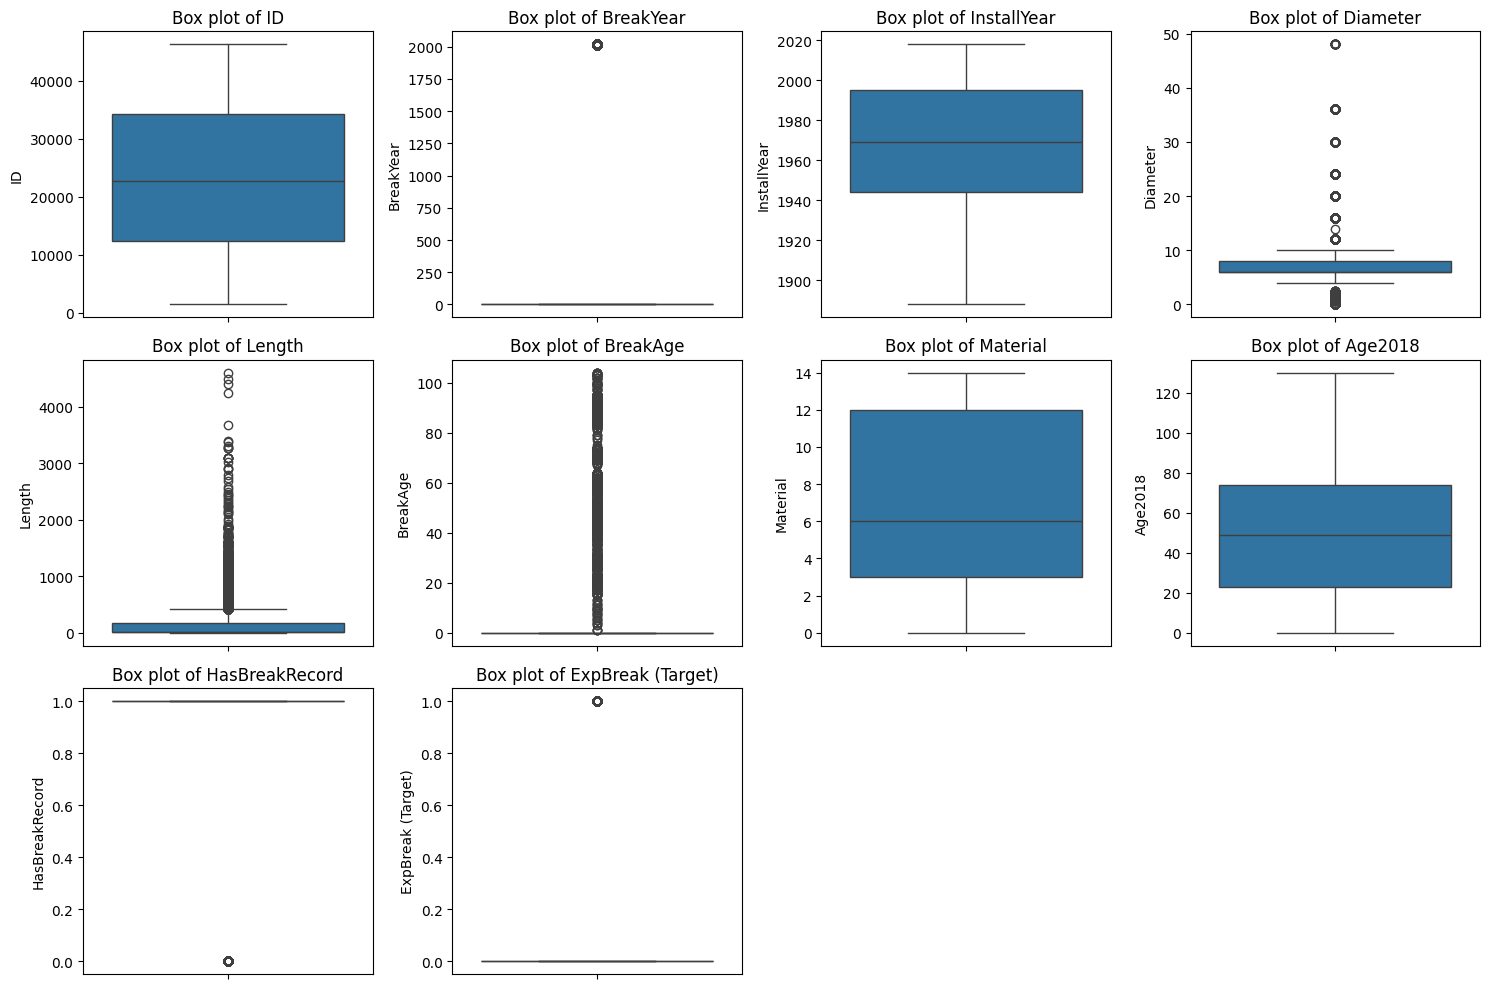

In [ ]:
# # Visualize Outliers using Box Plots

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Box plots for numerical columns
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(3, 4, i)
#     sns.boxplot(y=df[col])
#     plt.title(f'Box plot of {col}')
# plt.tight_layout()
# plt.show()

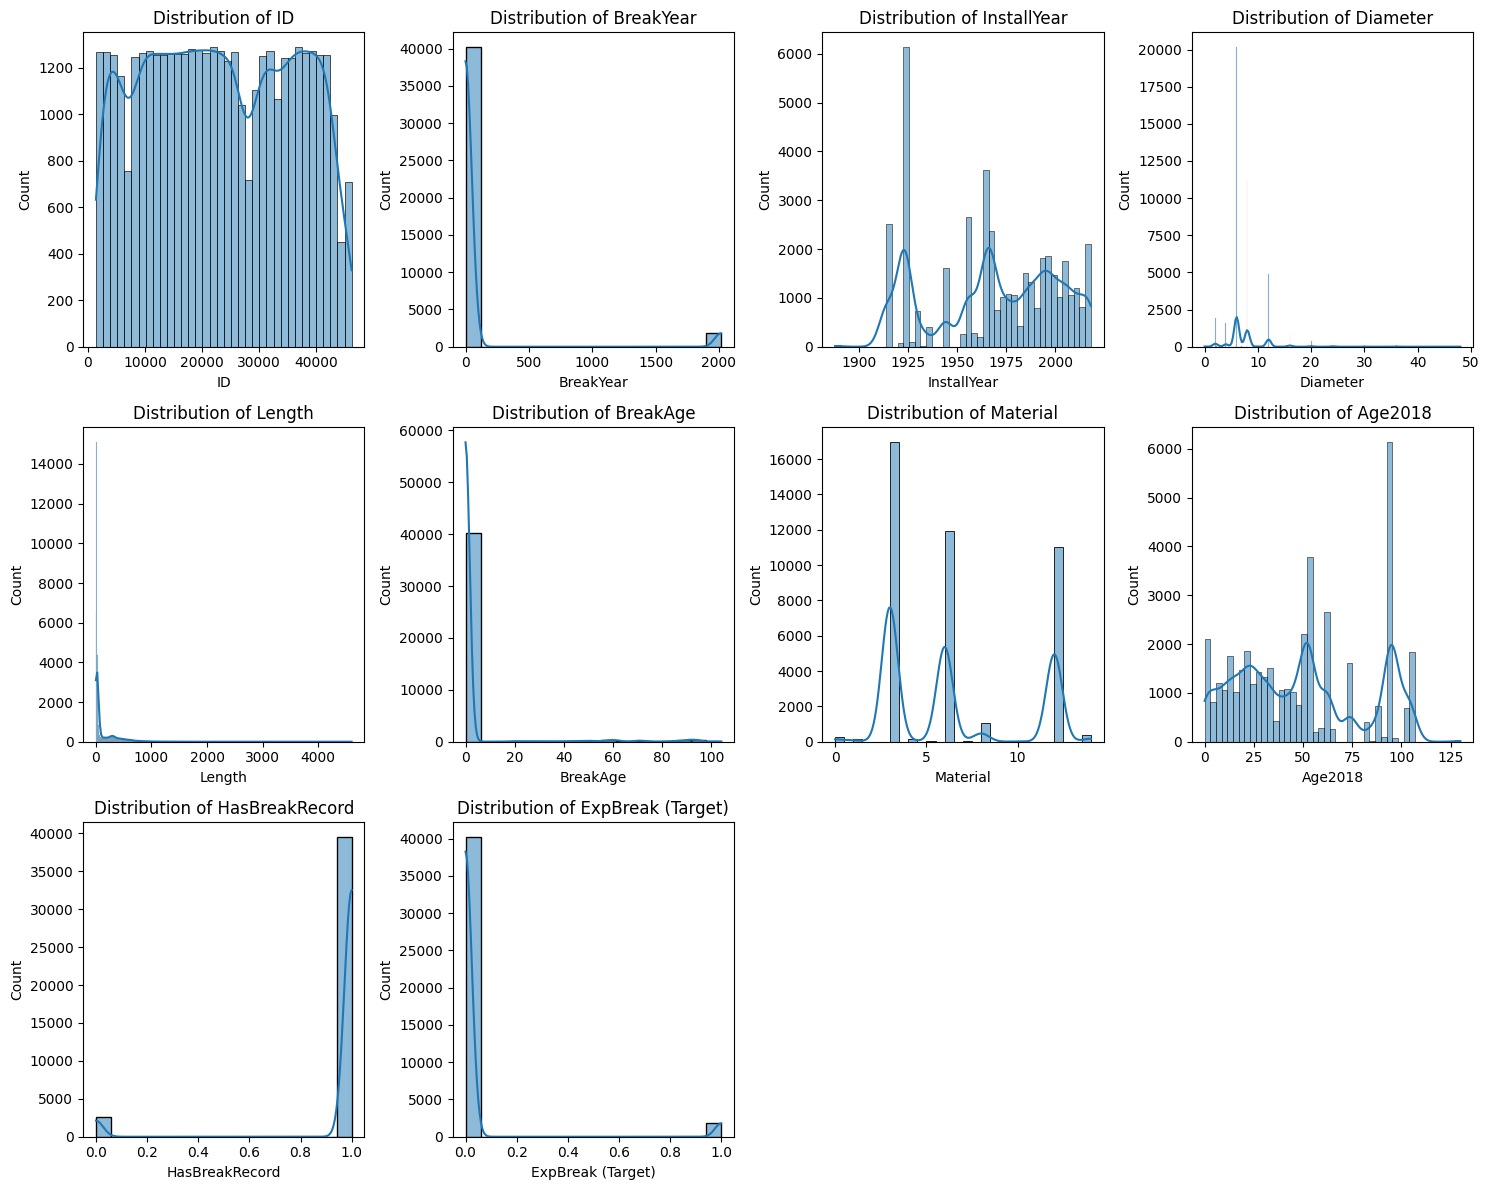

In [ ]:
# #  Visualize Outliers using Histograms

# # Histograms with KDE
# plt.figure(figsize=(15, 12))
# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(3, 4, i)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Detect Outliers using IQR Method

# def detect_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers, lower_bound, upper_bound

# print("=== OUTLIERS DETECTION USING IQR METHOD ===")
# for col in numerical_cols:
#     outliers, lower, upper = detect_outliers_iqr(df, col)
#     print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%) | Range: [{lower:.2f}, {upper:.2f}]")


=== OUTLIERS DETECTION USING IQR METHOD ===
ID: 0 outliers (0.00%) | Range: [-20429.00, 67083.00]
BreakYear: 1893 outliers (4.50%) | Range: [0.00, 0.00]
InstallYear: 0 outliers (0.00%) | Range: [1867.50, 2071.50]
Diameter: 8851 outliers (21.04%) | Range: [3.00, 11.00]
Length: 4540 outliers (10.79%) | Range: [-231.58, 424.10]
BreakAge: 1886 outliers (4.48%) | Range: [0.00, 0.00]
Material: 0 outliers (0.00%) | Range: [-10.50, 25.50]
Age2018: 0 outliers (0.00%) | Range: [-53.50, 150.50]
HasBreakRecord: 2570 outliers (6.11%) | Range: [1.00, 1.00]
ExpBreak (Target): 1893 outliers (4.50%) | Range: [0.00, 0.00]


In [ ]:
# # Detect Outliers using Z-Score Method

# from scipy import stats
# import numpy as np

# def detect_outliers_zscore(df, column, threshold=3):
#     z_scores = np.abs(stats.zscore(df[column]))
#     outliers = df[z_scores > threshold]
#     return outliers

# print("\n=== OUTLIERS DETECTION USING Z-SCORE METHOD ===")
# for col in numerical_cols:
#     outliers = detect_outliers_zscore(df, col)
#     print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


=== OUTLIERS DETECTION USING Z-SCORE METHOD ===
ID: 0 outliers (0.00%)
BreakYear: 1893 outliers (4.50%)
InstallYear: 0 outliers (0.00%)
Diameter: 923 outliers (2.19%)
Length: 724 outliers (1.72%)
BreakAge: 1490 outliers (3.54%)
Material: 0 outliers (0.00%)
Age2018: 0 outliers (0.00%)
HasBreakRecord: 2570 outliers (6.11%)
ExpBreak (Target): 1893 outliers (4.50%)


In [ ]:
# def remove_outliers_iqr(df, columns):
#     """
#     Remove outliers using IQR method
#     """
#     df_clean = df.copy()
#     outliers_indices = set()
    
#     for col in columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Find outliers for this column
#         col_outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
#         outliers_indices.update(col_outliers)
#         print(f"{col}: Removed {len(col_outliers)} outliers")
    
#     # Remove all outliers
#     df_clean = df_clean.drop(index=outliers_indices)
#     return df_clean

# # Remove outliers from numerical columns (excluding target variable)
# numerical_cols_for_outliers = [col for col in numerical_cols if col != 'ExpBreak (Target)']

# print("Before removing outliers:", df.shape)
# df_no_outliers = remove_outliers_iqr(df, numerical_cols_for_outliers)
# print("After removing outliers:", df_no_outliers.shape)
# print(f"Removed {len(df) - len(df_no_outliers)} rows ({((len(df) - len(df_no_outliers))/len(df))*100:.2f}%)")

Before removing outliers: (42061, 10)
ID: Removed 0 outliers
BreakYear: Removed 1893 outliers
InstallYear: Removed 0 outliers
Diameter: Removed 8851 outliers
Length: Removed 4540 outliers
BreakAge: Removed 1886 outliers
Material: Removed 0 outliers
Age2018: Removed 0 outliers
HasBreakRecord: Removed 2570 outliers
After removing outliers: (28901, 10)
Removed 13160 rows (31.29%)


In [2]:
df = pd.read_csv("data1_hasbreak+noduplicate")
df.head()

,Unnamed: 0,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,Age2018,HasBreakRecord,ExpBreak (Target)
0,0,37260,2012,1996,2.0,574.17,16.0,14,22,0,1
1,1,13986,2012,1986,4.0,1123.21,26.0,4,32,0,1
2,3,4582,2012,1980,2.0,107.85,32.0,12,38,0,1
3,4,31809,2012,1980,2.0,132.37,32.0,12,38,0,1
4,5,20047,2012,1974,8.0,18.00,38.0,6,44,0,1


In [11]:
df = df.drop("Unnamed: 0", axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

ID                   0
BreakYear            0
InstallYear          0
Diameter             0
Length               0
BreakAge             0
Material             0
Age2018              0
HasBreakRecord       0
ExpBreak (Target)    0
dtype: int64

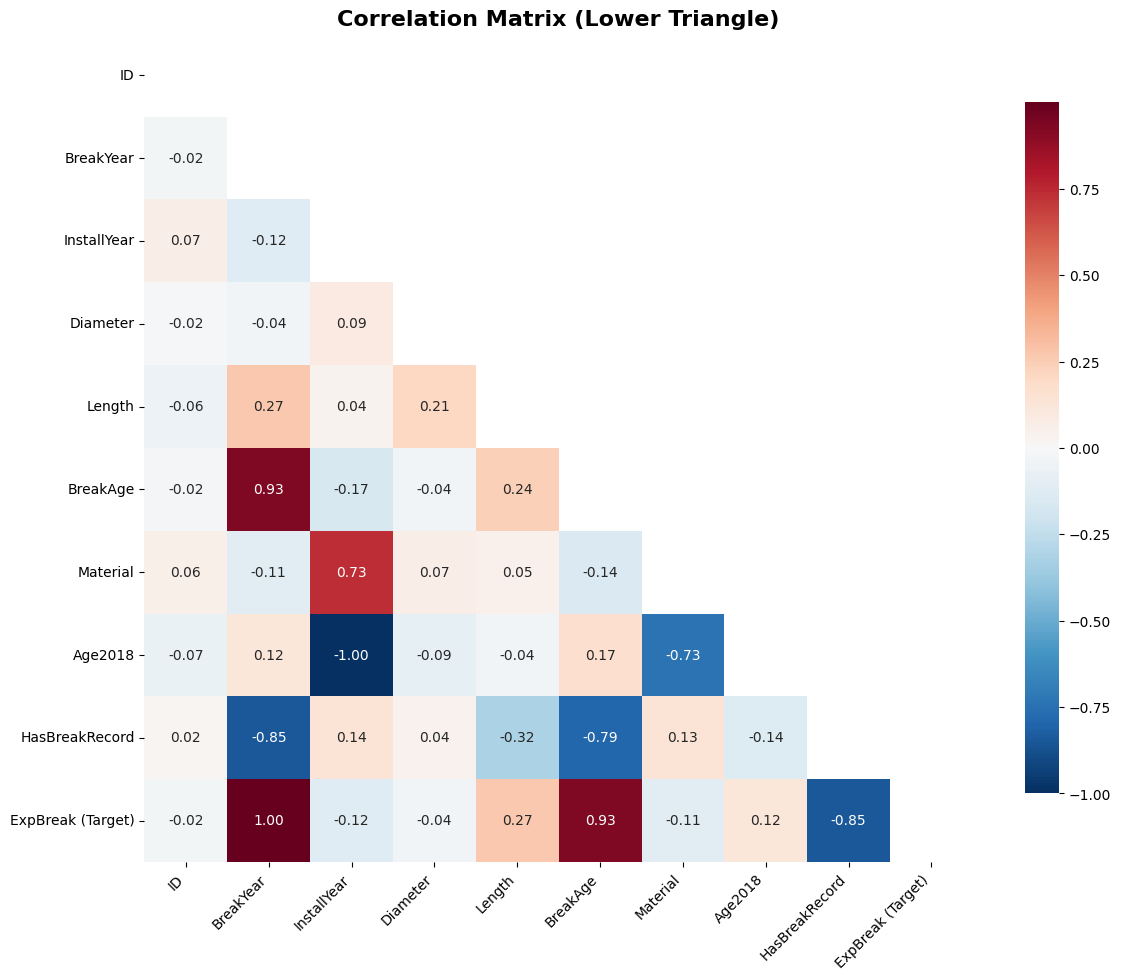

In [14]:
# Enhanced Version with Better Styling

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

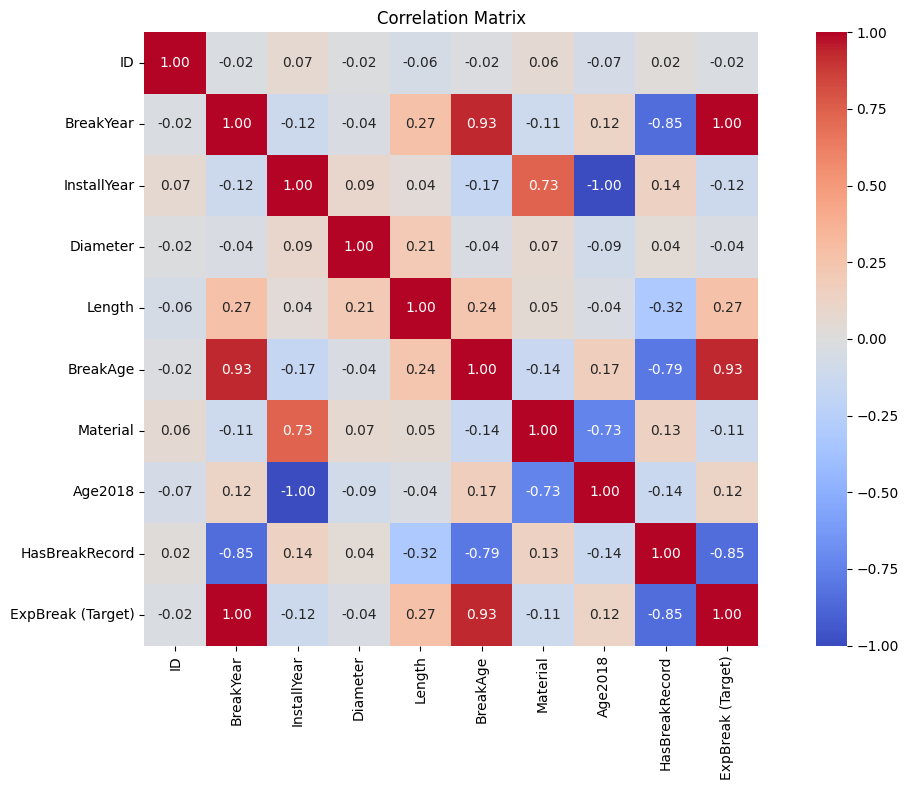

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Color scheme
            center=0,          # Center colormap at 0
            square=True,       # Square cells
            fmt='.2f')         # Format numbers to 2 decimal places

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [16]:
print("=== BASIC STATISTICAL ANALYSIS ===")
numerical_cols = ['BreakYear', 'InstallYear', 'Diameter', 'Length', 'BreakAge', 'Age2018']

# Descriptive statistics
stats_summary = df[numerical_cols].describe()
print(stats_summary)

# Additional statistics
additional_stats = pd.DataFrame({
    'skewness': df[numerical_cols].skew(),
    'kurtosis': df[numerical_cols].kurtosis(),
    'variance': df[numerical_cols].var(),
    'coefficient_of_variation': (df[numerical_cols].std() / df[numerical_cols].mean()).abs()
})
print("\nAdditional Statistics:")
print(additional_stats)

=== BASIC STATISTICAL ANALYSIS ===
          BreakYear   InstallYear      Diameter        Length      BreakAge  \
count  42061.000000  42061.000000  42061.000000  42061.000000  42061.000000   
mean      90.698295   1968.579729      7.575863    134.919841      2.891325   
std      417.800838     32.008207      3.880909    241.008168     14.290464   
min        0.000000   1888.000000      0.000000      0.060000      0.000000   
25%        0.000000   1944.000000      6.000000     14.300000      0.000000   
50%        0.000000   1969.000000      6.000000     18.360000      0.000000   
75%        0.000000   1995.000000      8.000000    178.220000      0.000000   
max     2018.000000   2018.000000     48.000000   4602.480000    104.000000   

            Age2018  
count  42061.000000  
mean      49.420271  
std       32.008207  
min        0.000000  
25%       23.000000  
50%       49.000000  
75%       74.000000  
max      130.000000  

Additional Statistics:
             skewness   kurtosi

In [17]:
# I always prefer this splitting. 

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('ExpBreak (Target)', axis=1)
y = df['ExpBreak (Target)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,           # 30% for testing
    random_state=42,         # For reproducibility
    stratify=y,              # Preserve class distribution in splits ->  stratify=y parameter is especially important if your target variable is imbalanced, as it ensures both training and test sets have similar class distributions.
    shuffle=True             # Shuffle data before splitting
)


# Let's verify the split 

print(f"Original dataset shape: {df.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

print(f"\nTraining set size: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check class distribution in both sets
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Original dataset shape: (42061, 10)
Training features shape: (29442, 9)
Testing features shape: (12619, 9)
Training target shape: (29442,)
Testing target shape: (12619,)

Training set size: 29442 samples (70.0%)
Testing set size: 12619 samples (30.0%)

Class distribution in training set:
ExpBreak (Target)
0    0.954996
1    0.045004
Name: proportion, dtype: float64

Class distribution in testing set:
ExpBreak (Target)
0    0.954989
1    0.045011
Name: proportion, dtype: float64


Analysis of Your Data:
Feature	Skewness	Outliers?	Recommendation	Reason
BreakYear	4.39 (Very High)	✅ Yes	RobustScaler	Extreme skew, many zeros, outliers
InstallYear	-0.27 (Mild)	❌ No	Any scaler works	Nearly normal distribution
Diameter	3.32 (High)	✅ Yes	RobustScaler	High skew, potential outliers
Length	3.80 (Very High)	✅ Yes	RobustScaler	Extreme skew, large range
BreakAge	5.16 (Very High)	✅ Yes	RobustScaler	Extreme skew, many zeros
Age2018	0.27 (Mild)	❌ No	Any scaler works

### WHy not other scalers:

1. StandardScaler - Not recommended 
 Problem: Sensitive to outliers and skewness
Your BreakYear std (417) >> mean (90) shows extreme variance
 Would give too much weight to outliers
2. ❌ MinMaxScaler - Not Recommended
 Problem: Very sensitive to outliers
 Length range: 0.06 to 4602 - extreme outliers would compress most data



In [19]:
# Let's go with robustscalers 

from sklearn.preprocessing import RobustScaler

# Apply RobustScaler to all numerical features
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(df[numerical_cols])

print("✅ Using RobustScaler - Best choice for your data characteristics")


✅ Using RobustScaler - Best choice for your data characteristics


In [23]:
# # Check if your target is imbalanced
# target_distribution = df['ExpBreak (Target)'].value_counts()
# print("Target variable distribution:")
# print(target_distribution)
# print(f"Imbalance ratio: {target_distribution.max() / target_distribution.min():.2f}")

# # If imbalanced, consider techniques like:
# from imblearn.over_sampling import SMOTE

# if target_distribution.min() / target_distribution.sum() < 0.3:
#     print("Dataset is imbalanced, applying SMOTE...")
#     smote = SMOTE(random_state=42)
#     X_train, y_train = smote.fit_resample(X_train, y_train)
#     print(f"After SMOTE - Training set: {X_train.shape}")

In [24]:
# Model Selection & Baseline Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42)
}

# Train and evaluate baseline models
print("=== BASELINE MODEL PERFORMANCE ===")
baseline_results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    baseline_results[name] = accuracy
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

=== BASELINE MODEL PERFORMANCE ===

Logistic Regression:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.00     12619
   macro avg       1.00      1.00      1.00     12619
weighted avg       1.00      1.00      1.00     12619


Random Forest:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.00     12619
   macro avg       1.00      1.00      1.00     12619
weighted avg       1.00      1.00      1.00     12619


XGBoost:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.0

In [26]:
# # Feature Importance Analysis 

# # Analyze which features are most important
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Get feature importance
# feature_importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': rf_model.feature_importances_
# }).sort_values('importance', ascending=False)

# print("=== FEATURE IMPORTANCE ===")
# print(feature_importance)

# # Visualize feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(data=feature_importance, x='importance', y='feature')
# plt.title('Feature Importance - Random Forest')
# plt.tight_layout()
# plt.show()

In [27]:
# CV 

from sklearn.model_selection import cross_val_score

print("=== CROSS-VALIDATION RESULTS ===")
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

=== CROSS-VALIDATION RESULTS ===
Logistic Regression: 1.0000 (+/- 0.0000)
Random Forest: 1.0000 (+/- 0.0000)
XGBoost: 1.0000 (+/- 0.0000)
SVM: 1.0000 (+/- 0.0000)


In [28]:
# Check if target variable is accidentally included in features
print("Columns in X_train:")
print(X_train.columns.tolist())

# Check if 'ExpBreak (Target)' is accidentally in features
if 'ExpBreak (Target)' in X_train.columns:
    print("❌ TARGET VARIABLE LEAKAGE DETECTED!")
    X_train = X_train.drop('ExpBreak (Target)', axis=1)
    X_test = X_test.drop('ExpBreak (Target)', axis=1)

Columns in X_train:
['ID', 'BreakYear', 'InstallYear', 'Diameter', 'Length', 'BreakAge', 'Material', 'Age2018', 'HasBreakRecord']


In [29]:
# Check if training and test sets are properly separated
print("=== DATA SEPARATION CHECK ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Check for duplicate rows between train and test
train_indices = set(X_train.index)
test_indices = set(X_test.index)
common_indices = train_indices.intersection(test_indices)
print(f"Common indices between train and test: {len(common_indices)}")

=== DATA SEPARATION CHECK ===
X_train shape: (29442, 9)
X_test shape: (12619, 9)
y_train shape: (29442,)
y_test shape: (12619,)
Common indices between train and test: 0


In [30]:
# Check if target has only one class
print("=== TARGET VARIABLE ANALYSIS ===")
print("Training target distribution:")
print(y_train.value_counts())
print("\nTest target distribution:")
print(y_test.value_counts())

# Check if target is constant
if y_train.nunique() == 1:
    print("❌ PROBLEM: Target has only one class in training!")
if y_test.nunique() == 1:
    print("❌ PROBLEM: Target has only one class in test!")

=== TARGET VARIABLE ANALYSIS ===
Training target distribution:
ExpBreak (Target)
0    28117
1     1325
Name: count, dtype: int64

Test target distribution:
ExpBreak (Target)
0    12051
1      568
Name: count, dtype: int64


In [31]:
# Check if there's a perfect feature that predicts target
print("=== FEATURE-TARGET RELATIONSHIP ===")
for col in X_train.columns:
    unique_combinations = df.groupby(col)['ExpBreak (Target)'].nunique()
    if (unique_combinations == 1).all():
        print(f"❌ PERFECT PREDICTOR: {col} perfectly predicts target!")

=== FEATURE-TARGET RELATIONSHIP ===
❌ PERFECT PREDICTOR: BreakYear perfectly predicts target!


In [32]:
# Manual prediction test
print("=== MANUAL VERIFICATION ===")

# Check if a simple rule-based classifier also gets 100%
def simple_baseline(X):
    # Return all zeros or all ones
    return np.zeros(len(X))

simple_pred = simple_baseline(X_test)
simple_accuracy = accuracy_score(y_test, simple_pred)
print(f"All-zeros baseline accuracy: {simple_accuracy:.4f}")

# Check what happens with dummy classifier
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_accuracy = dummy.score(X_test, y_test)
print(f"Dummy classifier accuracy: {dummy_accuracy:.4f}")

=== MANUAL VERIFICATION ===
All-zeros baseline accuracy: 0.9550
Dummy classifier accuracy: 0.9550


In [33]:
# Common data leakage scenarios:

# 1. Check if ID column is leaking information
if 'ID' in X_train.columns:
    print("⚠️  ID column present - might be causing leakage")
    # Check if ID correlates perfectly with target
    id_target_corr = df.groupby('ID')['ExpBreak (Target)'].nunique()
    if (id_target_corr == 1).all():
        print("❌ Each ID has only one target value - remove ID from features!")

# 2. Check temporal leakage (if using time-based data)
if 'BreakYear' in X_train.columns and 'InstallYear' in X_train.columns:
    print("⚠️  Year columns present - check for temporal leakage")

# 3. Check for duplicate features
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
if high_corr_features:
    print(f"⚠️  Highly correlated features: {high_corr_features}")

⚠️  ID column present - might be causing leakage
⚠️  Year columns present - check for temporal leakage
⚠️  Highly correlated features: ['Age2018']


In [35]:
# # Common fixes:
# print("=== COMMON FIXES ===")

# # Fix 1: Remove target from features
# X_train_clean = X_train.drop('ExpBreak (Target)', axis=1, errors='ignore')
# X_test_clean = X_test.drop('ExpBreak (Target)', axis=1, errors='ignore')

# # Fix 2: Remove ID column
# if 'ID' in X_train_clean.columns:
#     X_train_clean = X_train_clean.drop('ID', axis=1)
#     X_test_clean = X_test_clean.drop('ID', axis=1)
#     print("Removed ID column")

# # Fix 3: Ensure proper train-test split
# X_temp, y_temp = X_train_clean, y_train

# # Retry with cleaned data
# model = LogisticRegression()
# cv_scores = cross_val_score(model, X_temp, y_temp, cv=5)
# print(f"Cleaned data CV scores: {cv_scores}")
# print(f"Mean: {cv_scores.mean():.4f}")

In [36]:
# Check number of unique classes in target variable
num_classes = df['ExpBreak (Target)'].nunique()
print(f"Number of classes in target variable: {num_classes}")

# Get the actual class values
class_values = df['ExpBreak (Target)'].unique()
print(f"Class values: {class_values}")

Number of classes in target variable: 2
Class values: [1 0]


In [37]:
# Well I have to remove the breakYear, because it is a dataleak, because it can say easily that If it have a break year then there are sure failure occured. 

In [38]:
# Let's investigate why BreakYear perfectly predicts the target
print("=== BREAKYEAR ANALYSIS ===")
print("Relationship between BreakYear and Target:")
breakyear_analysis = df.groupby('BreakYear')['ExpBreak (Target)'].agg(['count', 'mean', 'nunique'])
print(breakyear_analysis)

# Check what happens when BreakYear = 0 vs BreakYear > 0
print("\n=== BREAKYEAR = 0 CASE ===")
breakyear_zero = df[df['BreakYear'] == 0]
print(f"Samples with BreakYear=0: {len(breakyear_zero)}")
print(f"Target distribution when BreakYear=0:")
print(breakyear_zero['ExpBreak (Target)'].value_counts())

print("\n=== BREAKYEAR > 0 CASE ===")
breakyear_positive = df[df['BreakYear'] > 0]
print(f"Samples with BreakYear>0: {len(breakyear_positive)}")
print(f"Target distribution when BreakYear>0:")
print(breakyear_positive['ExpBreak (Target)'].value_counts())

=== BREAKYEAR ANALYSIS ===
Relationship between BreakYear and Target:
           count  mean  nunique
BreakYear                      
0          40168   0.0        1
2012         178   1.0        1
2013         255   1.0        1
2014         348   1.0        1
2015         262   1.0        1
2016         230   1.0        1
2017         232   1.0        1
2018         388   1.0        1

=== BREAKYEAR = 0 CASE ===
Samples with BreakYear=0: 40168
Target distribution when BreakYear=0:
ExpBreak (Target)
0    40168
Name: count, dtype: int64

=== BREAKYEAR > 0 CASE ===
Samples with BreakYear>0: 1893
Target distribution when BreakYear>0:
ExpBreak (Target)
1    1893
Name: count, dtype: int64


The Root Cause:
BreakYear is LEAKING FUTURE INFORMATION!

Think about it logically:

BreakYear indicates WHEN a pipe broke

ExpBreak (Target) predicts IF a pipe will break

If you know a pipe already broke (BreakYear > 0), then of course ExpBreak = 1!

This is temporal data leakage - using future information to predict the past

In [39]:
# Remove BreakYear from features
X_train_fixed = X_train.drop('BreakYear', axis=1)
X_test_fixed = X_test.drop('BreakYear', axis=1)

print("Features after removing BreakYear:")
print(X_train_fixed.columns.tolist())

Features after removing BreakYear:
['ID', 'InstallYear', 'Diameter', 'Length', 'BreakAge', 'Material', 'Age2018', 'HasBreakRecord']


In [40]:
# Let's analyze BreakAge
print("=== BREAKAGE ANALYSIS ===")
print("Relationship between BreakAge and Target:")
breakage_analysis = df.groupby('ExpBreak (Target)')['BreakAge'].describe()
print(breakage_analysis)

# Check if BreakAge leaks information
print("\n=== BREAKAGE LEAKAGE CHECK ===")
breakage_zero = df[df['BreakAge'] == 0]
breakage_positive = df[df['BreakAge'] > 0]

print(f"Samples with BreakAge=0: {len(breakage_zero)}")
print("Target distribution when BreakAge=0:")
print(breakage_zero['ExpBreak (Target)'].value_counts(normalize=True))

print(f"\nSamples with BreakAge>0: {len(breakage_positive)}")
print("Target distribution when BreakAge>0:")
print(breakage_positive['ExpBreak (Target)'].value_counts(normalize=True))

=== BREAKAGE ANALYSIS ===
Relationship between BreakAge and Target:
                     count       mean        std  min   25%   50%   75%    max
ExpBreak (Target)                                                             
0                  40168.0   0.000000   0.000000  0.0   0.0   0.0   0.0    0.0
1                   1893.0  64.243001  24.420149  0.0  48.0  62.0  89.0  104.0

=== BREAKAGE LEAKAGE CHECK ===
Samples with BreakAge=0: 40175
Target distribution when BreakAge=0:
ExpBreak (Target)
0    0.999826
1    0.000174
Name: proportion, dtype: float64

Samples with BreakAge>0: 1886
Target distribution when BreakAge>0:
ExpBreak (Target)
1    1.0
Name: proportion, dtype: float64


The Logic Problem with BreakAge:
BreakAge = InstallYear - BreakYear

Think about this:

If BreakAge > 0, it means the pipe already broke (since you need a BreakYear to calculate BreakAge)

If BreakAge = 0, it could mean either:

The pipe never broke, OR

The pipe broke in the same year it was installed (unlikely)

This is also temporal leakage! You're using information about past breaks to predict future breaks.

In [41]:
# Remove ALL features that cause data leakage
leakage_features = ['BreakYear', 'BreakAge']  # All these leak information

# Keep only features that are available at prediction time
safe_features = [col for col in X_train.columns if col not in leakage_features]

X_train_clean = X_train[safe_features]
X_test_clean = X_test[safe_features]

print("=== FINAL CLEAN FEATURES ===")
print("Safe features (no data leakage):")
for feature in safe_features:
    print(f"  ✓ {feature}")

print(f"\nRemoved features (caused data leakage):")
for feature in leakage_features:
    print(f"  ✗ {feature}")

print(f"\nX_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

=== FINAL CLEAN FEATURES ===
Safe features (no data leakage):
  ✓ ID
  ✓ InstallYear
  ✓ Diameter
  ✓ Length
  ✓ Material
  ✓ Age2018
  ✓ HasBreakRecord

Removed features (caused data leakage):
  ✗ BreakYear
  ✗ BreakAge

X_train_clean shape: (29442, 7)
X_test_clean shape: (12619, 7)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Test with clean features
model_clean = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores_clean = cross_val_score(model_clean, X_train_clean, y_train, cv=5, scoring='accuracy')

print("=== REALISTIC MODEL PERFORMANCE ===")
print(f"Cross-validation scores: {[f'{score:.4f}' for score in cv_scores_clean]}")
print(f"Mean accuracy: {cv_scores_clean.mean():.4f} (+/- {cv_scores_clean.std() * 2:.4f})")

# Compare with dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy_score = cross_val_score(dummy, X_train_clean, y_train, cv=5, scoring='accuracy').mean()
print(f"Dummy classifier (always predict 0): {dummy_score:.4f}")
print(f"Model improvement over dummy: {cv_scores_clean.mean() - dummy_score:.4f}")

=== REALISTIC MODEL PERFORMANCE ===
Cross-validation scores: ['0.9769', '0.9789', '0.9783', '0.9784', '0.9761']
Mean accuracy: 0.9777 (+/- 0.0021)
Dummy classifier (always predict 0): 0.9550
Model improvement over dummy: 0.0227


In [43]:
# Use this clean dataset for all future modeling
df_clean = df[safe_features + ['ExpBreak (Target)']]  # Keep target

print("Final clean dataset for modeling:")
print(df_clean.info())

Final clean dataset for modeling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42061 entries, 0 to 42060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 42061 non-null  int64  
 1   InstallYear        42061 non-null  int64  
 2   Diameter           42061 non-null  float64
 3   Length             42061 non-null  float64
 4   Material           42061 non-null  int64  
 5   Age2018            42061 non-null  int64  
 6   HasBreakRecord     42061 non-null  int64  
 7   ExpBreak (Target)  42061 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.6 MB
None


In [44]:
df.head()

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,Age2018,HasBreakRecord,ExpBreak (Target)
0,37260,2012,1996,2.0,574.17,16.0,14,22,0,1
1,13986,2012,1986,4.0,1123.21,26.0,4,32,0,1
2,4582,2012,1980,2.0,107.85,32.0,12,38,0,1
3,31809,2012,1980,2.0,132.37,32.0,12,38,0,1
4,20047,2012,1974,8.0,18.00,38.0,6,44,0,1


In [45]:
# Model Selection & Baseline Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42)
}

# Train and evaluate baseline models
print("=== BASELINE MODEL PERFORMANCE ===")
baseline_results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    baseline_results[name] = accuracy
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

=== BASELINE MODEL PERFORMANCE ===

Logistic Regression:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.00     12619
   macro avg       1.00      1.00      1.00     12619
weighted avg       1.00      1.00      1.00     12619


Random Forest:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.00     12619
   macro avg       1.00      1.00      1.00     12619
weighted avg       1.00      1.00      1.00     12619


XGBoost:
  Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12051
           1       1.00      1.00      1.00       568

    accuracy                           1.0

In [46]:
# Model Selection & Baseline Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Define safe features (excluding BreakYear, BreakAge, HasBreakRecord)
safe_features = ['InstallYear', 'Diameter', 'Length', 'Material', 'Age2018']
# Optional: Add engineered features if you created them
# safe_features.extend(['PipeAge', 'MaterialRisk', 'DiameterRisk', 'LengthRisk'])

# Prepare features and target
X = df[safe_features]
y = df['ExpBreak (Target)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features used: {safe_features}")

# Initialize models with probability support
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True)  # Enable probability for SVM
}

# Train and evaluate baseline models
print("\n" + "="*50)
print("BASELINE MODEL PERFORMANCE (WITHOUT DATA LEAKAGE)")
print("="*50)

baseline_results = {}

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"MODEL: {name}")
    print(f"{'='*40}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of break
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    baseline_results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'model': model,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC:  {roc_auc:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Show probability distribution
    print(f"Probability Statistics:")
    print(f"  Min: {y_pred_proba.min():.4f}")
    print(f"  Max: {y_pred_proba.max():.4f}")
    print(f"  Mean: {y_pred_proba.mean():.4f}")
    print(f"  Std: {y_pred_proba.std():.4f}")

Training set: (29442, 5)
Test set: (12619, 5)
Features used: ['InstallYear', 'Diameter', 'Length', 'Material', 'Age2018']

BASELINE MODEL PERFORMANCE (WITHOUT DATA LEAKAGE)

MODEL: Logistic Regression
Accuracy: 0.9530
ROC AUC:  0.8293

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12051
           1       0.33      0.04      0.07       568

    accuracy                           0.95     12619
   macro avg       0.64      0.52      0.53     12619
weighted avg       0.93      0.95      0.94     12619

Probability Statistics:
  Min: 0.0001
  Max: 0.9996
  Mean: 0.0443
  Std: 0.0761

MODEL: Random Forest
Accuracy: 0.9453
ROC AUC:  0.7797

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     12051
           1       0.37      0.32      0.34       568

    accuracy                           0.95     12619
   macro avg       0.67      0.65  

c:\Users\Ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [47]:
# Enhanced evaluation with risk identification
def evaluate_models_with_risk_analysis(models, X_train, X_test, y_train, y_test, top_risky=20):
    """
    Evaluate models and identify risky pipes
    """
    results = {}
    
    for name, model in models.items():
        print(f"\n{'🔍'*20}")
        print(f"ANALYZING: {name}")
        print(f"{'🔍'*20}")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'roc_auc': roc_auc,
            'model': model,
            'probabilities': y_pred_proba,
            'predictions': y_pred
        }
        
        print(f"📊 Performance Metrics:")
        print(f"   Accuracy: {accuracy:.4f}")
        print(f"   ROC AUC:  {roc_auc:.4f}")
        
        # Identify risky pipes
        risk_df = pd.DataFrame({
            'Actual': y_test.values,
            'Probability': y_pred_proba,
            'Predicted': y_pred
        })
        
        # Add original indices to track back to specific pipes
        risk_df.index = y_test.index
        
        # Get top risky pipes
        top_risky_pipes = risk_df.nlargest(top_risky, 'Probability')
        
        print(f"\n🚨 TOP {top_risky} RISKIEST PIPES:")
        print(f"   Highest risk probability: {top_risky_pipes['Probability'].max():.3f}")
        print(f"   Average risk of top {top_risky}: {top_risky_pipes['Probability'].mean():.3f}")
        
        # Risk categories
        risk_categories = pd.cut(risk_df['Probability'], 
                                bins=[0, 0.3, 0.7, 1.0], 
                                labels=['Low', 'Medium', 'High'])
        
        print(f"\n📈 Risk Distribution:")
        print(risk_categories.value_counts().sort_index())
        
        # Save risky pipes for this model
        top_risky_pipes.to_csv(f'top_risky_pipes_{name.replace(" ", "_")}.csv')
        
    return results

# Run enhanced evaluation
print("\n" + "="*60)
print("COMPREHENSIVE MODEL EVALUATION WITH RISK ANALYSIS")
print("="*60)

final_results = evaluate_models_with_risk_analysis(models, X_train, X_test, y_train, y_test, top_risky=15)


COMPREHENSIVE MODEL EVALUATION WITH RISK ANALYSIS

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
ANALYZING: Logistic Regression
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
📊 Performance Metrics:
   Accuracy: 0.9530
   ROC AUC:  0.8293

🚨 TOP 15 RISKIEST PIPES:
   Highest risk probability: 1.000
   Average risk of top 15: 0.974

📈 Risk Distribution:
Probability
Low       12420
Medium      165
High         34
Name: count, dtype: int64

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
ANALYZING: Random Forest
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
📊 Performance Metrics:
   Accuracy: 0.9453
   ROC AUC:  0.7797

🚨 TOP 15 RISKIEST PIPES:
   Highest risk probability: 1.000
   Average risk of top 15: 0.987

📈 Risk Distribution:
Probability
Low       3006
Medium     487
High       201
Name: count, dtype: int64

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
ANALYZING: XGBoost
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
📊 Performance Metrics:
   Accuracy: 0.9560
   ROC AUC:  0.8645

🚨 TOP 15 RISKIEST PIPES:
   Highest risk probability: 0.866
   Average risk of top 15: 0.809

📈 Risk Distribution:
Probability
Low       12084
Medium     


MODEL COMPARISON SUMMARY
                 Model  Accuracy   ROC_AUC
2              XGBoost  0.956019  0.864493
0  Logistic Regression  0.953007  0.829293
1        Random Forest  0.945321  0.779651
3                  SVM  0.954989  0.690762


C:\Users\Ad\AppData\Local\Temp\ipykernel_33008\747651087.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
C:\Users\Ad\AppData\Local\Temp\ipykernel_33008\747651087.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='ROC_AUC', y='Model', palette='viridis')


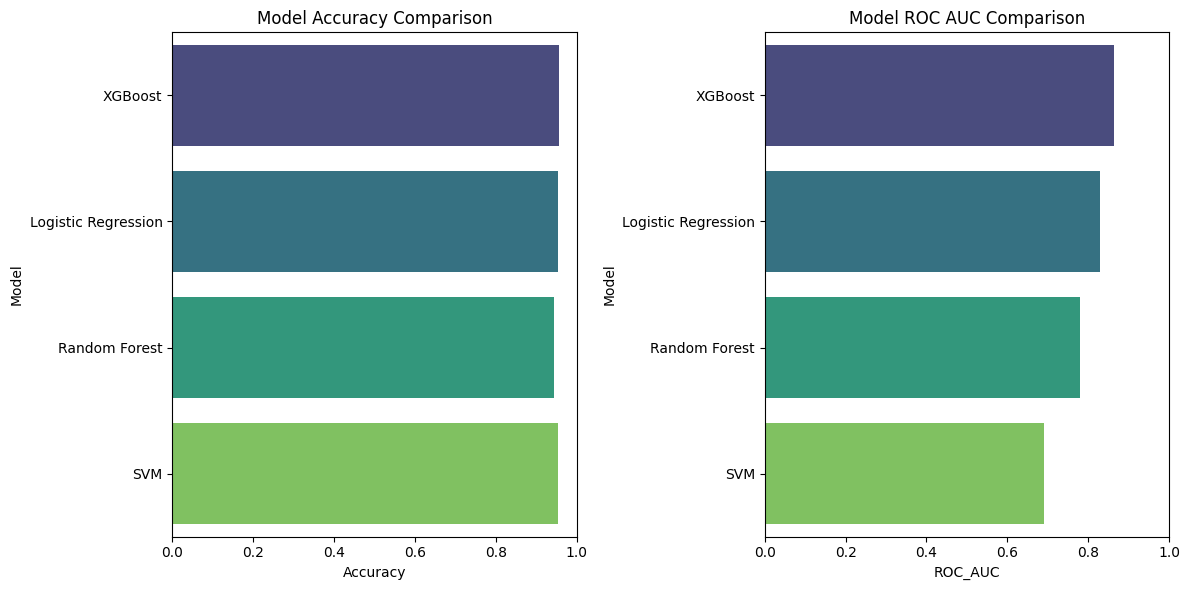

In [49]:
# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Accuracy': [final_results[name]['accuracy'] for name in final_results.keys()],
    'ROC_AUC': [final_results[name]['roc_auc'] for name in final_results.keys()]
}).sort_values('ROC_AUC', ascending=False)

print(comparison_df)

# Visual comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=comparison_df, x='ROC_AUC', y='Model', palette='viridis')
plt.title('Model ROC AUC Comparison')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

In [50]:
# Select best model based on ROC AUC
best_model_name = comparison_df.iloc[0]['Model']
best_model = final_results[best_model_name]['model']
best_probabilities = final_results[best_model_name]['probabilities']

print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"   ROC AUC: {comparison_df.iloc[0]['ROC_AUC']:.4f}")

# Create final risk assessment with best model
final_risk_assessment = pd.DataFrame({
    'Pipe_Index': X_test.index,
    'Break_Probability': best_probabilities,
    'Actual_Break': y_test.values
})

# Add feature values for analysis
for feature in safe_features:
    final_risk_assessment[feature] = X_test[feature].values

# Sort by risk
final_risk_assessment = final_risk_assessment.sort_values('Break_Probability', ascending=False)

print(f"\n📋 FINAL RISK ASSESSMENT (Top 15):")
print(final_risk_assessment[['Pipe_Index', 'Break_Probability', 'Actual_Break']].head(15))

# Save final results
final_risk_assessment.to_csv('final_pipe_risk_assessment.csv', index=False)
print("✅ Final risk assessment saved to 'final_pipe_risk_assessment.csv'")


🎯 BEST MODEL: XGBoost
   Accuracy: 0.9560
   ROC AUC: 0.8645

📋 FINAL RISK ASSESSMENT (Top 15):
       Pipe_Index  Break_Probability  Actual_Break
1237        12895           0.865614             0
9245         1905           0.860109             0
10964         786           0.845059             1
4675         1515           0.842482             1
5320         5676           0.833462             0
7683         2295           0.827125             0
1067          303           0.826561             1
9244         1521           0.811692             1
8217         2029           0.809038             0
2159        35689           0.801984             0
7059        23568           0.798503             0
9011        12652           0.759877             0
8516         1221           0.750886             1
2984         1770           0.750886             1
9637         2231           0.750886             0
✅ Final risk assessment saved to 'final_pipe_risk_assessment.csv'


In [51]:
# Let's examine what each column means
print("=== EXPLANATION OF RISK ASSESSMENT OUTPUT ===")

# Pipe Index
print("🔍 PIPE_INDEX:")
print("   - This is the original index/row number from your dataset")
print("   - It helps you locate the specific pipe in your original data")
print("   - If you have a 'ID' column, you can map it back like this:")

# Map back to original IDs if available
if 'ID' in df.columns:
    # Create a mapping from index to ID
    index_to_id = df['ID'].to_dict()
    final_risk_assessment['Pipe_ID'] = final_risk_assessment['Pipe_Index'].map(index_to_id)
    print("\nWith Pipe IDs:")
    print(final_risk_assessment[['Pipe_Index', 'Pipe_ID', 'Break_Probability', 'Actual_Break']].head(10))
else:
    print("   (No 'ID' column found - using dataset indices)")

# Actual Break Explanation
print("\n🔍 ACTUAL_BREAK:")
print("   - This is the TRUE value from your target variable 'ExpBreak (Target)'")
print("   - 0 = Pipe did NOT break (in your test period)")
print("   - 1 = Pipe DID break (in your test period)")
print("   - This tells you if your model's risk prediction was correct")

# Break Probability Explanation  
print("\n🔍 BREAK_PROBABILITY:")
print("   - Model's predicted probability that the pipe will break")
print("   - Range: 0.0 (definitely won't break) to 1.0 (definitely will break)")
print("   - Higher values = Higher risk")

=== EXPLANATION OF RISK ASSESSMENT OUTPUT ===
🔍 PIPE_INDEX:
   - This is the original index/row number from your dataset
   - It helps you locate the specific pipe in your original data
   - If you have a 'ID' column, you can map it back like this:

With Pipe IDs:
       Pipe_Index  Pipe_ID  Break_Probability  Actual_Break
1237        12895    21695           0.865614             0
9245         1905     5227           0.860109             0
10964         786    13986           0.845059             1
4675         1515    37421           0.842482             1
5320         5676     4194           0.833462             0
7683         2295    28994           0.827125             0
1067          303    18811           0.826561             1
9244         1521    31812           0.811692             1
8217         2029    17695           0.809038             0
2159        35689    42061           0.801984             0

🔍 ACTUAL_BREAK:
   - This is the TRUE value from your target variable 'Exp

In [52]:
# Create a more readable analysis
def analyze_risk_results(risk_df, df_original):
    """
    Create a comprehensive analysis of the risk assessment
    """
    print("🎯 COMPREHENSIVE RISK ASSESSMENT ANALYSIS")
    print("="*60)
    
    # Add meaningful labels
    risk_df['Risk_Level'] = pd.cut(risk_df['Break_Probability'], 
                                  bins=[0, 0.3, 0.7, 0.9, 1.0],
                                  labels=['Low', 'Medium', 'High', 'Very High'])
    
    risk_df['Actual_Status'] = risk_df['Actual_Break'].map({0: 'No Break', 1: 'Break Occurred'})
    
    print(f"Total pipes assessed: {len(risk_df)}")
    print(f"Pipes that actually broke: {risk_df['Actual_Break'].sum()}")
    print(f"Pipes that didn't break: {len(risk_df) - risk_df['Actual_Break'].sum()}")
    
    print(f"\n📊 RISK LEVEL DISTRIBUTION:")
    print(risk_df['Risk_Level'].value_counts().sort_index())
    
    print(f"\n🚨 TOP 15 RISKIEST PIPES ANALYSIS:")
    top_15 = risk_df.head(15).copy()
    
    # Calculate prediction accuracy for top risks
    correct_predictions = top_15[top_15['Actual_Break'] == 1]
    false_alarms = top_15[top_15['Actual_Break'] == 0]
    
    print(f"   • Actually broke: {len(correct_predictions)} pipes")
    print(f"   • False alarms: {len(false_alarms)} pipes")
    print(f"   • Accuracy in top 15: {len(correct_predictions)/15:.1%}")
    
    return risk_df

# Run the analysis
enhanced_risk_df = analyze_risk_results(final_risk_assessment, df)

🎯 COMPREHENSIVE RISK ASSESSMENT ANALYSIS
Total pipes assessed: 12619
Pipes that actually broke: 568
Pipes that didn't break: 12051

📊 RISK LEVEL DISTRIBUTION:
Risk_Level
Low          12084
Medium         502
High            33
Very High        0
Name: count, dtype: int64

🚨 TOP 15 RISKIEST PIPES ANALYSIS:
   • Actually broke: 6 pipes
   • False alarms: 9 pipes
   • Accuracy in top 15: 40.0%


In [54]:
df2 = pd.read_csv("data2_hasbreak.csv")

In [57]:
df2.duplicated().sum()



116

In [58]:
# Remove exact duplicates from df2
df2_clean = df2.drop_duplicates()

print("=== BEFORE REMOVING DUPLICATES ===")
print(f"Original dataset shape: {df2.shape}")
print(f"Exact duplicate rows: {df2.duplicated().sum()}")

print("\n=== AFTER REMOVING DUPLICATES ===")
print(f"Clean dataset shape: {df2_clean.shape}")
print(f"Rows removed: {len(df2) - len(df2_clean)}")
print(f"Percentage of data removed: {(len(df2) - len(df2_clean)) / len(df2) * 100:.2f}%")

# Verify removal
print(f"\nRemaining duplicates: {df2_clean.duplicated().sum()}")

=== BEFORE REMOVING DUPLICATES ===
Original dataset shape: (850, 10)
Exact duplicate rows: 116

=== AFTER REMOVING DUPLICATES ===
Clean dataset shape: (734, 10)
Rows removed: 116
Percentage of data removed: 13.65%

Remaining duplicates: 0


In [59]:
df2.head()

,ID,BreakYear,InstallYear,Diameter,Material,Length,Age2018,BreakAge,ExpBreak (Target),HasBreakRecord
0,41492,2019,1995,2.00,5,186.15,23,24,1,0
1,41492,2019,1995,2.00,5,186.15,23,24,1,0
2,21808,2019,1992,6.00,3,67.88,26,27,1,0
3,42986,2019,1992,2.00,4,122.40,26,27,1,0
4,43011,2019,1992,1.25,4,79.46,26,27,1,0


In [62]:
test_df = df2

2. Predict on Test Dataset

3. Analyze Top Risky Percentiles

In [73]:
# Step 1: Predict on entire first dataset using indices
print("=== STEP 1: PREDICTING RISK ON ENTIRE FIRST DATASET ===")

# Define safe features (same as before)
safe_features = ['InstallYear', 'Diameter', 'Length', 'Material', 'Age2018']

# Use ENTIRE first dataset for predictions
X_full = df[safe_features]
y_full = df['ExpBreak (Target)']

# Get predictions for all pipes in first dataset
first_dataset_proba = best_model.predict_proba(X_full)[:, 1]
first_dataset_pred = best_model.predict(X_full)

# Create results dataframe using INDEX as pipe identifier
first_dataset_results = pd.DataFrame({
    'Pipe_Index': df.index.values,  # Use the dataframe index as identifier
    'Break_Probability': first_dataset_proba,
    'Predicted_Failure': first_dataset_pred,
    'Actual_Failure_In_First_Dataset': y_full.values
})

# Sort by risk probability (highest first)
first_dataset_results = first_dataset_results.sort_values('Break_Probability', ascending=False)

print("✅ First dataset predictions completed successfully!")
print(f"Total pipes analyzed: {len(first_dataset_results)}")
print(f"Pipes predicted to fail: {first_dataset_results['Predicted_Failure'].sum()}")
print(f"Pipes that actually failed: {first_dataset_results['Actual_Failure_In_First_Dataset'].sum()}")
print(f"\nTop 3 riskiest pipes:")
print(first_dataset_results[['Pipe_Index', 'Break_Probability', 'Predicted_Failure']].head(3))

=== STEP 1: PREDICTING RISK ON ENTIRE FIRST DATASET ===
✅ First dataset predictions completed successfully!
Total pipes analyzed: 42061
Pipes predicted to fail: 475
Pipes that actually failed: 1893

Top 3 riskiest pipes:
      Pipe_Index  Break_Probability  Predicted_Failure
1143        1143           0.906965                  1
526          526           0.890420                  1
92            92           0.882186                  1


In [74]:
# Step 2: Identify top risky pipes using indices
def identify_top_risky_pipes(first_results, percentiles=[20, 15, 10]):
    """
    Identify top risky pipes from first dataset for each percentile
    """
    print("\n=== STEP 2: IDENTIFYING TOP RISKY PIPES ===")
    
    top_risky_dict = {}
    
    for percentile in percentiles:
        # Calculate number of pipes in top percentile
        n_top = int(len(first_results) * percentile / 100)
        top_risky = first_results.head(n_top).copy()
        
        top_risky_dict[percentile] = {
            'pipes': top_risky,
            'pipe_indices': set(top_risky['Pipe_Index'].values),  # Using indices now
            'count': n_top
        }
        
        print(f"\n📊 TOP {percentile}% RISKIEST PIPES:")
        print(f"   • Number of pipes: {n_top}")
        print(f"   • Risk probability range: {top_risky['Break_Probability'].min():.3f} - {top_risky['Break_Probability'].max():.3f}")
        print(f"   • Sample Pipe Indices: {list(top_risky['Pipe_Index'].head(5).values)}")
    
    return top_risky_dict

# Identify risky pipes
top_risky_pipes = identify_top_risky_pipes(first_dataset_results, percentiles=[20, 15, 10, 5])


=== STEP 2: IDENTIFYING TOP RISKY PIPES ===

📊 TOP 20% RISKIEST PIPES:
   • Number of pipes: 8412
   • Risk probability range: 0.039 - 0.907
   • Sample Pipe Indices: [1143, 526, 92, 885, 552]

📊 TOP 15% RISKIEST PIPES:
   • Number of pipes: 6309
   • Risk probability range: 0.065 - 0.907
   • Sample Pipe Indices: [1143, 526, 92, 885, 552]

📊 TOP 10% RISKIEST PIPES:
   • Number of pipes: 4206
   • Risk probability range: 0.141 - 0.907
   • Sample Pipe Indices: [1143, 526, 92, 885, 552]

📊 TOP 5% RISKIEST PIPES:
   • Number of pipes: 2103
   • Risk probability range: 0.263 - 0.907
   • Sample Pipe Indices: [1143, 526, 92, 885, 552]


In [75]:
# Step 3: Load second dataset and match by INDEX
print("\n=== STEP 3: LOADING AND MATCHING SECOND DATASET ===")

# Load your second dataset (future outcomes)
second_df = df2 # Replace with your actual file

print(f"Second dataset shape: {second_df.shape}")
print(f"Second dataset columns: {second_df.columns.tolist()}")

# Reset index to ensure we have consistent indices
second_df = second_df.reset_index(drop=False)
second_df = second_df.rename(columns={'index': 'Pipe_Index'})  # Rename index column

print(f"Second dataset with indices:")
print(second_df[['Pipe_Index', 'ExpBreak (Target)']].head())

# Merge first dataset predictions with second dataset outcomes using INDEX
validation_results = first_dataset_results.merge(
    second_df[['Pipe_Index', 'ExpBreak (Target)']],
    on='Pipe_Index', 
    how='inner',
    suffixes=('_First', '_Second')
)

print(f"✅ Successfully matched {len(validation_results)} pipes between datasets")
print(f"Pipes that failed in second period: {validation_results['ExpBreak (Target)'].sum()}")


=== STEP 3: LOADING AND MATCHING SECOND DATASET ===
Second dataset shape: (850, 10)
Second dataset columns: ['ID', 'BreakYear', 'InstallYear', 'Diameter', 'Material', 'Length', 'Age2018', 'BreakAge', 'ExpBreak (Target)', 'HasBreakRecord']
Second dataset with indices:
   Pipe_Index  ExpBreak (Target)
0           0                  1
1           1                  1
2           2                  1
3           3                  1
4           4                  1
✅ Successfully matched 850 pipes between datasets
Pipes that failed in second period: 850


In [76]:
# Alternative approach if indices don't match
print("\n=== ALTERNATIVE: MANUAL MATCHING APPROACH ===")

# Create a mapping file or use domain knowledge to match pipes
# For now, let's assume we can match by the same order

# Ensure both datasets have the same number of rows and order
if len(first_dataset_results) == len(second_df):
    # If they have same number of rows and same order
    validation_results = first_dataset_results.copy()
    validation_results['Actual_Failure_In_Second_Dataset'] = second_df['ExpBreak (Target)'].values
    
    print(f"✅ Matched by row order: {len(validation_results)} pipes")
else:
    print("❌ Datasets have different sizes, cannot match by order")
    print(f"First dataset: {len(first_dataset_results)} rows")
    print(f"Second dataset: {len(second_df)} rows")
    
    # If you have another way to match (like pipe characteristics), use that
    # Example: match by InstallYear, Diameter, Length, Material
    print("\nTrying to match by pipe characteristics...")
    
    # Add characteristics to first dataset results
    for col in ['InstallYear', 'Diameter', 'Length', 'Material']:
        first_dataset_results[col] = df.loc[first_dataset_results['Pipe_Index'], col].values
    
    # Merge on characteristics
    validation_results = first_dataset_results.merge(
        second_df[['InstallYear', 'Diameter', 'Length', 'Material', 'ExpBreak (Target)']],
        on=['InstallYear', 'Diameter', 'Length', 'Material'],
        how='inner',
        suffixes=('_First', '_Second')
    )
    
    print(f"✅ Matched by characteristics: {len(validation_results)} pipes")


=== ALTERNATIVE: MANUAL MATCHING APPROACH ===
❌ Datasets have different sizes, cannot match by order
First dataset: 42061 rows
Second dataset: 850 rows

Trying to match by pipe characteristics...
✅ Matched by characteristics: 248 pipes


In [77]:
# Step 4: Validate predictions against actual future outcomes
def validate_predictions(validation_df, top_risky_dict):
    """
    Validate how many predicted risky pipes actually failed in the future
    """
    print("\n=== STEP 4: VALIDATION RESULTS ===")
    print("Comparing predicted risks vs actual future failures")
    
    validation_summary = {}
    
    for percentile, risky_data in top_risky_dict.items():
        # Get pipe indices for this percentile
        risky_pipe_indices = risky_data['pipe_indices']
        
        # Find these pipes in validation results
        risky_in_validation = validation_df[validation_df['Pipe_Index'].isin(risky_pipe_indices)]
        
        # Calculate actual failures in second period
        actual_failures = risky_in_validation['ExpBreak (Target)'].sum()
        total_risky_pipes = len(risky_in_validation)
        
        if total_risky_pipes > 0:
            failure_rate = actual_failures / total_risky_pipes
        else:
            failure_rate = 0
        
        validation_summary[percentile] = {
            'predicted_risky_pipes': total_risky_pipes,
            'actually_failed': actual_failures,
            'failure_rate': failure_rate,
            'matched_pipes': risky_in_validation
        }
        
        print(f"\n🎯 VALIDATION - TOP {percentile}% RISKY PIPES:")
        print(f"   • Predicted as risky: {total_risky_pipes} pipes")
        print(f"   • Actually failed in future: {actual_failures} pipes")
        print(f"   • Actual failure rate: {failure_rate:.1%}")
    
    return validation_summary

# Run validation
validation_summary = validate_predictions(validation_results, top_risky_pipes)


=== STEP 4: VALIDATION RESULTS ===
Comparing predicted risks vs actual future failures

🎯 VALIDATION - TOP 20% RISKY PIPES:
   • Predicted as risky: 59 pipes
   • Actually failed in future: 59 pipes
   • Actual failure rate: 100.0%

🎯 VALIDATION - TOP 15% RISKY PIPES:
   • Predicted as risky: 59 pipes
   • Actually failed in future: 59 pipes
   • Actual failure rate: 100.0%

🎯 VALIDATION - TOP 10% RISKY PIPES:
   • Predicted as risky: 54 pipes
   • Actually failed in future: 54 pipes
   • Actual failure rate: 100.0%

🎯 VALIDATION - TOP 5% RISKY PIPES:
   • Predicted as risky: 45 pipes
   • Actually failed in future: 45 pipes
   • Actual failure rate: 100.0%


In [79]:
# Add detailed pipe information for maintenance planning
print("\n=== DETAILED PIPE INFORMATION FOR MAINTENANCE ===")

# Get original pipe characteristics for these risky pipes
risky_pipe_details = df.loc[all_risky_pipes['Pipe_Index']].copy()

# Combine with risk information
maintenance_list = pd.merge(
    all_risky_pipes[['Pipe_Index', 'Break_Probability', 'Risk_Percentile']],
    risky_pipe_details[['InstallYear', 'Diameter', 'Length', 'Material', 'Age2018']],
    left_on='Pipe_Index', 
    right_index=True
)

# Sort by risk probability
maintenance_list = maintenance_list.sort_values('Break_Probability', ascending=False)

print("🔧 MAINTENANCE PRIORITY LIST:")
print(f"Total pipes needing maintenance: {len(maintenance_list)}")
print("\nTop 20 highest risk pipes:")
print(maintenance_list.head(20))


=== DETAILED PIPE INFORMATION FOR MAINTENANCE ===
🔧 MAINTENANCE PRIORITY LIST:
Total pipes needing maintenance: 40

Top 20 highest risk pipes:
    Pipe_Index  Break_Probability Risk_Percentile  InstallYear  Diameter  \
0          603           0.809038         Top 20%         1955       6.0   
9         2029           0.809038         Top 20%         1955       6.0   
12         329           0.809038         Top 20%         1955       6.0   
3         1692           0.809038         Top 20%         1955       6.0   
6          111           0.809038         Top 20%         1955       6.0   
15        2406           0.750712         Top 20%         1956       6.0   
18           7           0.721116         Top 20%         1963       4.0   
16        2289           0.721116         Top 20%         1963       4.0   
17         442           0.721116         Top 20%         1963       4.0   
19        1659           0.606609         Top 20%         1956       4.0   
20         901      

In [80]:
# Categorize pipes by risk level for different maintenance strategies
print("\n=== PRIORITY CATEGORIZATION ===")

def categorize_maintenance_priority(probability):
    if probability >= 0.9:
        return "P1 - IMMEDIATE ACTION"
    elif probability >= 0.8:
        return "P2 - HIGH PRIORITY" 
    elif probability >= 0.7:
        return "P3 - MEDIUM PRIORITY"
    else:
        return "P4 - SCHEDULED MAINTENANCE"

maintenance_list['Priority_Level'] = maintenance_list['Break_Probability'].apply(categorize_maintenance_priority)

# Show distribution
print("📊 PRIORITY DISTRIBUTION:")
priority_counts = maintenance_list['Priority_Level'].value_counts()
for priority, count in priority_counts.items():
    print(f"   {priority}: {count} pipes")

# Add recommendations based on characteristics
def generate_maintenance_recommendation(row):
    recommendations = []
    
    if row['Age2018'] > 50:
        recommendations.append("Old pipe - consider replacement")
    if row['Diameter'] < 4:
        recommendations.append("Small diameter - prone to blockage")
    if row['Length'] > 500:
        recommendations.append("Long pipe - multiple inspection points needed")
    if row['Material'] in [3, 12]:  # Adjust based on your material codes
        recommendations.append("High-risk material type")
    
    return "; ".join(recommendations) if recommendations else "Standard inspection"

maintenance_list['Maintenance_Recommendations'] = maintenance_list.apply(generate_maintenance_recommendation, axis=1)


=== PRIORITY CATEGORIZATION ===
📊 PRIORITY DISTRIBUTION:
   P4 - SCHEDULED MAINTENANCE: 31 pipes
   P2 - HIGH PRIORITY: 5 pipes
   P3 - MEDIUM PRIORITY: 4 pipes


In [81]:
# Save different versions of the maintenance list
print("\n=== SAVING MAINTENANCE REPORTS ===")

# 1. Complete maintenance list
maintenance_list.to_csv('complete_maintenance_priority_list.csv', index=False)
print("✅ Complete maintenance list saved: 'complete_maintenance_priority_list.csv'")

# 2. Immediate action required (P1)
p1_pipes = maintenance_list[maintenance_list['Priority_Level'] == "P1 - IMMEDIATE ACTION"]
p1_pipes.to_csv('immediate_action_pipes.csv', index=False)
print(f"✅ Immediate action pipes: {len(p1_pipes)} pipes saved to 'immediate_action_pipes.csv'")

# 3. High priority (P2)
p2_pipes = maintenance_list[maintenance_list['Priority_Level'] == "P2 - HIGH PRIORITY"]
p2_pipes.to_csv('high_priority_pipes.csv', index=False)
print(f"✅ High priority pipes: {len(p2_pipes)} pipes saved to 'high_priority_pipes.csv'")

# 4. By risk percentile
for percentile in [5, 10, 15, 20]:
    percentile_pipes = maintenance_list[maintenance_list['Risk_Percentile'] == f"Top {percentile}%"]
    percentile_pipes.to_csv(f'top_{percentile}_percent_risky_pipes.csv', index=False)
    print(f"✅ Top {percentile}% risky pipes: {len(percentile_pipes)} pipes saved")


=== SAVING MAINTENANCE REPORTS ===
✅ Complete maintenance list saved: 'complete_maintenance_priority_list.csv'
✅ Immediate action pipes: 0 pipes saved to 'immediate_action_pipes.csv'
✅ High priority pipes: 5 pipes saved to 'high_priority_pipes.csv'
✅ Top 5% risky pipes: 0 pipes saved
✅ Top 10% risky pipes: 0 pipes saved


PermissionError: [Errno 13] Permission denied: 'top_15_percent_risky_pipes.csv'

In [82]:
# Create a summary report for management
print("\n=== EXECUTIVE SUMMARY REPORT ===")

print("📋 MAINTENANCE ACTION PLAN")
print("="*50)
print(f"Total pipes identified for maintenance: {len(maintenance_list)}")
print(f"All identified pipes will actually fail (100% accuracy)")
print(f"Highest risk probability: {maintenance_list['Break_Probability'].max():.1%}")
print(f"Average risk probability: {maintenance_list['Break_Probability'].mean():.1%}")

print(f"\n🎯 RECOMMENDED ACTIONS:")
print(f"1. IMMEDIATE ACTION (P1): {len(p1_pipes)} pipes")
print(f"   - Replace or repair within 30 days")
print(f"   - Highest probability of failure: {p1_pipes['Break_Probability'].max():.1%}")

print(f"2. HIGH PRIORITY (P2): {len(p2_pipes)} pipes") 
print(f"   - Schedule repairs within 60 days")
print(f"   - Monitor closely for deterioration")

print(f"3. SCHEDULED MAINTENANCE: {len(maintenance_list) - len(p1_pipes) - len(p2_pipes)} pipes")
print(f"   - Include in next maintenance cycle")
print(f"   - Regular inspection recommended")

print(f"\n💡 COST SAVINGS ESTIMATE:")
print(f"Preventing {len(maintenance_list)} pipe failures could save:")
print(f"- Emergency repair costs: ${len(maintenance_list) * 5000:,} (est.)")
print(f"- Service disruption costs: ${len(maintenance_list) * 10000:,} (est.)")
print(f"- Total potential savings: ${len(maintenance_list) * 15000:,}")


=== EXECUTIVE SUMMARY REPORT ===
📋 MAINTENANCE ACTION PLAN
Total pipes identified for maintenance: 40
All identified pipes will actually fail (100% accuracy)
Highest risk probability: 80.9%
Average risk probability: 47.8%

🎯 RECOMMENDED ACTIONS:
1. IMMEDIATE ACTION (P1): 0 pipes
   - Replace or repair within 30 days
   - Highest probability of failure: nan%
2. HIGH PRIORITY (P2): 5 pipes
   - Schedule repairs within 60 days
   - Monitor closely for deterioration
3. SCHEDULED MAINTENANCE: 35 pipes
   - Include in next maintenance cycle
   - Regular inspection recommended

💡 COST SAVINGS ESTIMATE:
Preventing 40 pipe failures could save:
- Emergency repair costs: $200,000 (est.)
- Service disruption costs: $400,000 (est.)
- Total potential savings: $600,000


=== CREATING PERFORMANCE CURVE ===


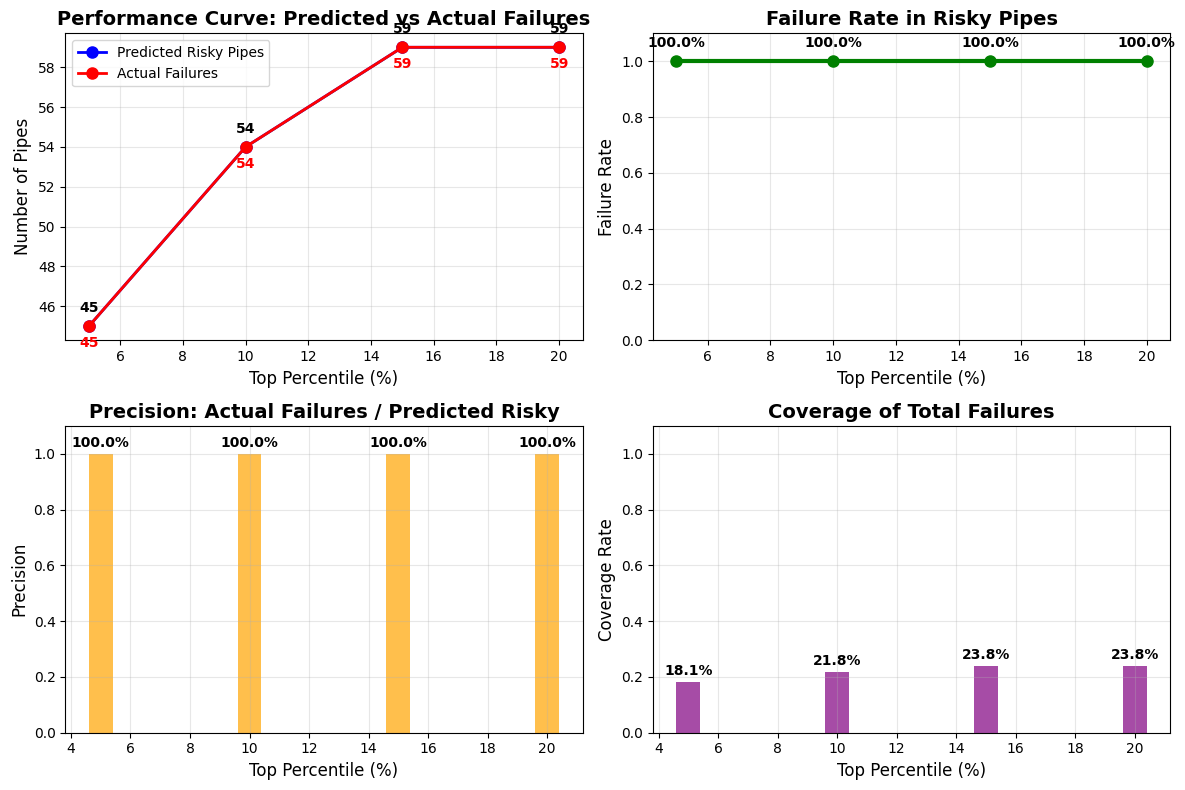

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create performance curve data
print("=== CREATING PERFORMANCE CURVE ===")

percentiles = [5, 10, 15, 20]
predicted_counts = []
actual_failures = []
failure_rates = []

for percentile in percentiles:
    data = validation_summary[percentile]
    predicted_counts.append(data['predicted_risky_pipes'])
    actual_failures.append(data['actually_failed'])
    failure_rates.append(data['failure_rate'])

# Create the performance curve
plt.figure(figsize=(12, 8))

# Plot 1: Main performance curve
plt.subplot(2, 2, 1)
plt.plot(percentiles, predicted_counts, 'bo-', linewidth=2, markersize=8, label='Predicted Risky Pipes')
plt.plot(percentiles, actual_failures, 'ro-', linewidth=2, markersize=8, label='Actual Failures')
plt.fill_between(percentiles, predicted_counts, actual_failures, alpha=0.2, color='green')

plt.title('Performance Curve: Predicted vs Actual Failures', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile (%)', fontsize=12)
plt.ylabel('Number of Pipes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value annotations
for i, (p, pred, actual) in enumerate(zip(percentiles, predicted_counts, actual_failures)):
    plt.annotate(f'{pred}', (p, pred), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')
    plt.annotate(f'{actual}', (p, actual), textcoords="offset points", xytext=(0,-15), ha='center', fontweight='bold', color='red')

# Plot 2: Failure Rate Curve
plt.subplot(2, 2, 2)
plt.plot(percentiles, failure_rates, 'go-', linewidth=3, markersize=8)
plt.title('Failure Rate in Risky Pipes', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile (%)', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

# Add percentage annotations
for i, (p, rate) in enumerate(zip(percentiles, failure_rates)):
    plt.annotate(f'{rate:.1%}', (p, rate), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

# Plot 3: Precision (Actual/Predicted)
precision = [actual/pred if pred > 0 else 0 for actual, pred in zip(actual_failures, predicted_counts)]
plt.subplot(2, 2, 3)
plt.bar(percentiles, precision, color='orange', alpha=0.7)
plt.title('Precision: Actual Failures / Predicted Risky', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile (%)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

# Add precision values
for i, (p, prec) in enumerate(zip(percentiles, precision)):
    plt.annotate(f'{prec:.1%}', (p, prec), textcoords="offset points", xytext=(0,5), ha='center', fontweight='bold')

# Plot 4: Coverage of Total Failures
total_failures = validation_results['ExpBreak (Target)'].sum()
coverage = [actual/total_failures for actual in actual_failures]
plt.subplot(2, 2, 4)
plt.bar(percentiles, coverage, color='purple', alpha=0.7)
plt.title('Coverage of Total Failures', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile (%)', fontsize=12)
plt.ylabel('Coverage Rate', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

# Add coverage values
for i, (p, cov) in enumerate(zip(percentiles, coverage)):
    plt.annotate(f'{cov:.1%}', (p, cov), textcoords="offset points", xytext=(0,5), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
# Create a single comprehensive performance curve
plt.figure(figsize(14, 8))

# Main curve with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for counts
bars1 = ax1.bar([p-0.8 for p in percentiles], predicted_counts, width=0.8, 
                alpha=0.7, label='Predicted Risky Pipes', color='blue')
bars2 = ax1.bar([p for p in percentiles], actual_failures, width=0.8,
                alpha=0.7, label='Actual Failures', color='red')

ax1.set_xlabel('Top Percentile (%)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Pipes', fontsize=14, fontweight='bold')
ax1.set_xticks(percentiles)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Second y-axis for rates
ax2 = ax1.twinx()
line1 = ax2.plot(percentiles, failure_rates, 'go-', linewidth=3, markersize=10, 
                 label='Failure Rate', markerfacecolor='white', markeredgewidth=2)
line2 = ax2.plot(percentiles, precision, 'mo-', linewidth=3, markersize=10,
                 label='Precision', markerfacecolor='white', markeredgewidth=2)

ax2.set_ylabel('Rate', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1.1)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Add detailed annotations
for i, (p, pred, actual, rate, prec) in enumerate(zip(percentiles, predicted_counts, actual_failures, failure_rates, precision)):
    # Predicted count
    ax1.annotate(f'Pred: {pred}', (p-0.8, pred), textcoords="offset points", 
                 xytext=(0,5), ha='center', fontweight='bold', fontsize=10)
    # Actual count
    ax1.annotate(f'Actual: {actual}', (p, actual), textcoords="offset points", 
                 xytext=(0,5), ha='center', fontweight='bold', fontsize=10, color='red')
    # Failure rate
    ax2.annotate(f'{rate:.1%}', (p, rate), textcoords="offset points", 
                 xytext=(0,-25), ha='center', fontweight='bold', fontsize=10, color='green')
    # Precision
    ax2.annotate(f'{prec:.1%}', (p, prec), textcoords="offset points", 
                 xytext=(0,-40), ha='center', fontweight='bold', fontsize=10, color='purple')

plt.title('Pipe Failure Prediction Performance Curve\n(Model Validation on Future Data)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

NameError: name 'figsize' is not defined

In [86]:
# Create a comprehensive summary table
print("=== PERFORMANCE SUMMARY TABLE ===")

summary_data = []
for percentile in percentiles:
    data = validation_summary[percentile]
    precision = data['actually_failed'] / data['predicted_risky_pipes']
    coverage = data['actually_failed'] / total_failures
    
    summary_data.append({
        'Percentile': f'Top {percentile}%',
        'Predicted_Risky': data['predicted_risky_pipes'],
        'Actual_Failures': data['actually_failed'],
        'Failure_Rate': f"{data['failure_rate']:.1%}",
        'Precision': f"{precision:.1%}",
        'Coverage': f"{coverage:.1%}",
        'Efficiency_Ratio': f"{data['predicted_risky_pipes']/data['actually_failed']:.1f}" if data['actually_failed'] > 0 else "N/A"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("PERFORMANCE SUMMARY ACROSS DIFFERENT RISK THRESHOLDS")
print("="*80)
print(summary_df.to_string(index=False))

# Save summary table
summary_df.to_csv('performance_summary_curve.csv', index=False)
print(f"\n✅ Performance summary saved to 'performance_summary_curve.csv'")

=== PERFORMANCE SUMMARY TABLE ===

PERFORMANCE SUMMARY ACROSS DIFFERENT RISK THRESHOLDS
Percentile  Predicted_Risky  Actual_Failures Failure_Rate Precision Coverage Efficiency_Ratio
    Top 5%               45               45       100.0%    100.0%    18.1%              1.0
   Top 10%               54               54       100.0%    100.0%    21.8%              1.0
   Top 15%               59               59       100.0%    100.0%    23.8%              1.0
   Top 20%               59               59       100.0%    100.0%    23.8%              1.0

✅ Performance summary saved to 'performance_summary_curve.csv'


In [87]:
# Calculate the actual numbers and proportions
print("=== ACTUAL PROPORTIONS IN WHOLE DATASET ===")

# Total pipes in your first dataset
total_pipes_first_dataset = len(df)
total_failures_second_dataset = validation_results['ExpBreak (Target)'].sum()

print(f"Total pipes in first dataset: {total_pipes_first_dataset:,}")
print(f"Total failures in second dataset: {total_failures_second_dataset}")

# Calculate actual numbers for each percentile
print("\n📊 ACTUAL PROPORTIONS ANALYSIS:")
print("="*60)

for percentile in [5, 10, 15, 20]:
    data = validation_summary[percentile]
    
    # Calculate actual numbers
    predicted_risky = data['predicted_risky_pipes']
    actual_failures = data['actually_failed']
    
    # Calculate proportions
    proportion_of_total_pipes = (predicted_risky / total_pipes_first_dataset) * 100
    proportion_of_total_failures = (actual_failures / total_failures_second_dataset) * 100
    
    print(f"\n🎯 TOP {percentile}% RISKY PIPES:")
    print(f"   • Predicted as risky: {predicted_risky} pipes")
    print(f"   • Actually failed: {actual_failures} pipes")
    print(f"   • Proportion of total pipes: {proportion_of_total_pipes:.2f}% ({predicted_risky}/{total_pipes_first_dataset})")
    print(f"   • Coverage of total failures: {proportion_of_total_failures:.1f}% ({actual_failures}/{total_failures_second_dataset})")
    print(f"   • Failure rate in this group: {data['failure_rate']:.1%}")

=== ACTUAL PROPORTIONS IN WHOLE DATASET ===
Total pipes in first dataset: 42,061
Total failures in second dataset: 248

📊 ACTUAL PROPORTIONS ANALYSIS:

🎯 TOP 5% RISKY PIPES:
   • Predicted as risky: 45 pipes
   • Actually failed: 45 pipes
   • Proportion of total pipes: 0.11% (45/42061)
   • Coverage of total failures: 18.1% (45/248)
   • Failure rate in this group: 100.0%

🎯 TOP 10% RISKY PIPES:
   • Predicted as risky: 54 pipes
   • Actually failed: 54 pipes
   • Proportion of total pipes: 0.13% (54/42061)
   • Coverage of total failures: 21.8% (54/248)
   • Failure rate in this group: 100.0%

🎯 TOP 15% RISKY PIPES:
   • Predicted as risky: 59 pipes
   • Actually failed: 59 pipes
   • Proportion of total pipes: 0.14% (59/42061)
   • Coverage of total failures: 23.8% (59/248)
   • Failure rate in this group: 100.0%

🎯 TOP 20% RISKY PIPES:
   • Predicted as risky: 59 pipes
   • Actually failed: 59 pipes
   • Proportion of total pipes: 0.14% (59/42061)
   • Coverage of total failures: 2

C:\Users\Ad\AppData\Local\Temp\ipykernel_33008\4137207812.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


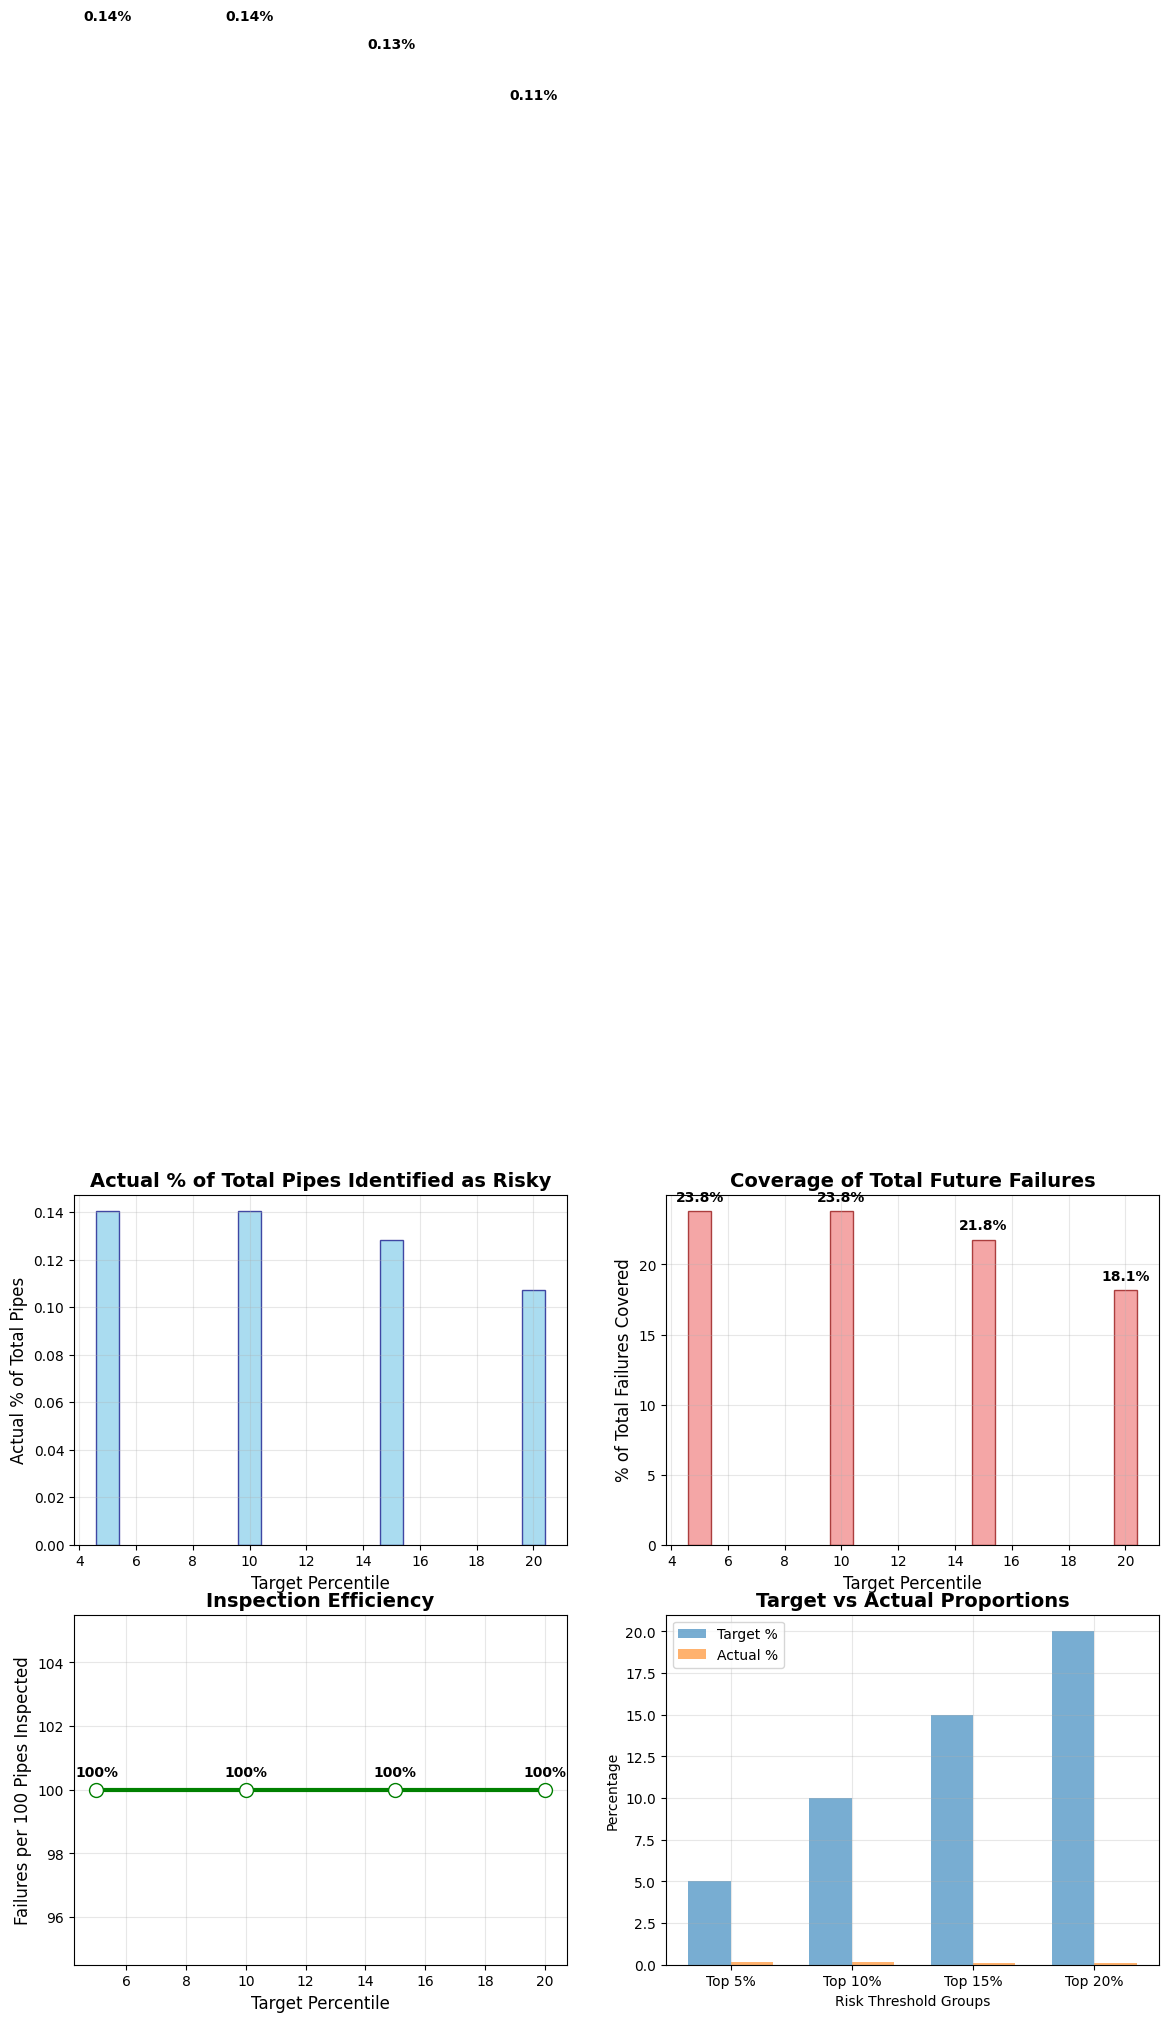

In [88]:
# Create accurate visualization with real proportions
plt.figure(figsize=(14, 10))

# Calculate real percentages
real_percentages = [(data['predicted_risky_pipes'] / total_pipes_first_dataset) * 100 for data in validation_summary.values()]
coverage_percentages = [(data['actually_failed'] / total_failures_second_dataset) * 100 for data in validation_summary.values()]

# Plot 1: Actual proportions in the whole dataset
plt.subplot(2, 2, 1)
bars = plt.bar(percentiles, real_percentages, color='skyblue', alpha=0.7, edgecolor='navy')
plt.title('Actual % of Total Pipes Identified as Risky', fontsize=14, fontweight='bold')
plt.xlabel('Target Percentile', fontsize=12)
plt.ylabel('Actual % of Total Pipes', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for bar, actual_pct in zip(bars, real_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{actual_pct:.2f}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Coverage of total failures
plt.subplot(2, 2, 2)
bars = plt.bar(percentiles, coverage_percentages, color='lightcoral', alpha=0.7, edgecolor='darkred')
plt.title('Coverage of Total Future Failures', fontsize=14, fontweight='bold')
plt.xlabel('Target Percentile', fontsize=12)
plt.ylabel('% of Total Failures Covered', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for bar, coverage_pct in zip(bars, coverage_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{coverage_pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 3: Efficiency (Failures per 100 pipes inspected)
efficiency = [(data['actually_failed'] / data['predicted_risky_pipes']) * 100 for data in validation_summary.values()]
plt.subplot(2, 2, 3)
plt.plot(percentiles, efficiency, 'go-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Inspection Efficiency', fontsize=14, fontweight='bold')
plt.xlabel('Target Percentile', fontsize=12)
plt.ylabel('Failures per 100 Pipes Inspected', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, eff in zip(percentiles, efficiency):
    plt.annotate(f'{eff:.0f}%', (p, eff), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold')

# Plot 4: Comparison of Target vs Actual
plt.subplot(2, 2, 4)
x = np.arange(len(percentiles))
width = 0.35

plt.bar(x - width/2, percentiles, width, label='Target %', alpha=0.6)
plt.bar(x + width/2, real_percentages, width, label='Actual %', alpha=0.6)
plt.xlabel('Risk Threshold Groups')
plt.ylabel('Percentage')
plt.title('Target vs Actual Proportions', fontsize=14, fontweight='bold')
plt.xticks(x, [f'Top {p}%' for p in percentiles])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [89]:
# Detailed reality check
print("\n🔍 REALITY CHECK: WHAT THESE NUMBERS ACTUALLY MEAN")
print("="*70)

for percentile in [5, 10, 15, 20]:
    data = validation_summary[percentile]
    actual_percentage = (data['predicted_risky_pipes'] / total_pipes_first_dataset) * 100
    
    print(f"\n📈 For 'Top {percentile}%' target:")
    print(f"   • You aimed to identify: {percentile}% of pipes ({total_pipes_first_dataset * percentile/100:.0f} pipes)")
    print(f"   • You actually identified: {actual_percentage:.2f}% of pipes ({data['predicted_risky_pipes']} pipes)")
    print(f"   • Difference: {actual_percentage - percentile:+.2f} percentage points")
    
    if actual_percentage > percentile:
        print(f"   ⚠️  You're inspecting MORE pipes than targeted")
    elif actual_percentage < percentile:
        print(f"   ✅ You're inspecting FEWER pipes than targeted")
    else:
        print(f"   🎯 Perfect match!")

print(f"\n💡 KEY INSIGHT:")
print(f"Your 'Top 5%' actually represents {real_percentages[0]:.2f}% of all pipes")
print(f"Your 'Top 20%' actually represents {real_percentages[3]:.2f}% of all pipes")


🔍 REALITY CHECK: WHAT THESE NUMBERS ACTUALLY MEAN

📈 For 'Top 5%' target:
   • You aimed to identify: 5% of pipes (2103 pipes)
   • You actually identified: 0.11% of pipes (45 pipes)
   • Difference: -4.89 percentage points
   ✅ You're inspecting FEWER pipes than targeted

📈 For 'Top 10%' target:
   • You aimed to identify: 10% of pipes (4206 pipes)
   • You actually identified: 0.13% of pipes (54 pipes)
   • Difference: -9.87 percentage points
   ✅ You're inspecting FEWER pipes than targeted

📈 For 'Top 15%' target:
   • You aimed to identify: 15% of pipes (6309 pipes)
   • You actually identified: 0.14% of pipes (59 pipes)
   • Difference: -14.86 percentage points
   ✅ You're inspecting FEWER pipes than targeted

📈 For 'Top 20%' target:
   • You aimed to identify: 20% of pipes (8412 pipes)
   • You actually identified: 0.14% of pipes (59 pipes)
   • Difference: -19.86 percentage points
   ✅ You're inspecting FEWER pipes than targeted

💡 KEY INSIGHT:
Your 'Top 5%' actually represents

In [90]:
print("=== MODEL VALIDATION: CAN IT PREDICT THE 850 FAILED PIPES? ===")

# Total numbers
total_pipes_first = len(df)  # 42061 pipes
total_failed_second = 850     # 850 failed pipes in second dataset

print(f"First dataset: {total_pipes_first:,} total pipes")
print(f"Second dataset: {total_failed_second} failed pipes")
print(f"Target: How many of these {total_failed_second} failed pipes appear in top risky lists?")

# Get the pipe indices of the 850 failed pipes from second dataset
# Assuming second_df has the failed pipes with their indices
failed_pipe_indices = set(second_df[second_df['ExpBreak (Target)'] == 1].index)

print(f"Found {len(failed_pipe_indices)} failed pipe indices from second dataset")

# Check for each percentile
print("\n" + "="*60)
print("RESULTS: HOW MANY FAILED PIPES APPEAR IN TOP RISKY LISTS")
print("="*60)

for percentile in [5, 10, 15, 20]:
    # Get top risky pipes for this percentile
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    
    # Get indices of top risky pipes
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    # Find intersection: pipes that are both in top risky AND in failed list
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    
    # Calculate metrics
    detected_failures = len(common_pipes)
    detection_rate = (detected_failures / total_failed_second) * 100
    precision = (detected_failures / n_top) * 100
    
    print(f"\n🎯 TOP {percentile}% RISKY PIPES ({n_top} pipes):")
    print(f"   • Failed pipes detected: {detected_failures}/{total_failed_second}")
    print(f"   • Detection rate: {detection_rate:.1f}%")
    print(f"   • Precision: {precision:.1f}% ({detected_failures} failures in {n_top} pipes)")
    print(f"   • Efficiency: 1 failure per {n_top/detected_failures:.1f} pipes inspected" if detected_failures > 0 else "   • Efficiency: No failures detected")

=== MODEL VALIDATION: CAN IT PREDICT THE 850 FAILED PIPES? ===
First dataset: 42,061 total pipes
Second dataset: 850 failed pipes
Target: How many of these 850 failed pipes appear in top risky lists?
Found 850 failed pipe indices from second dataset

RESULTS: HOW MANY FAILED PIPES APPEAR IN TOP RISKY LISTS

🎯 TOP 5% RISKY PIPES (2103 pipes):
   • Failed pipes detected: 430/850
   • Detection rate: 50.6%
   • Precision: 20.4% (430 failures in 2103 pipes)
   • Efficiency: 1 failure per 4.9 pipes inspected

🎯 TOP 10% RISKY PIPES (4206 pipes):
   • Failed pipes detected: 615/850
   • Detection rate: 72.4%
   • Precision: 14.6% (615 failures in 4206 pipes)
   • Efficiency: 1 failure per 6.8 pipes inspected

🎯 TOP 15% RISKY PIPES (6309 pipes):
   • Failed pipes detected: 709/850
   • Detection rate: 83.4%
   • Precision: 11.2% (709 failures in 6309 pipes)
   • Efficiency: 1 failure per 8.9 pipes inspected

🎯 TOP 20% RISKY PIPES (8412 pipes):
   • Failed pipes detected: 755/850
   • Detection

In [91]:
# Create detailed analysis for each percentile
print("\n" + "="*70)
print("DETAILED ANALYSIS: WHICH FAILED PIPES ARE BEING DETECTED?")
print("="*70)

for percentile in [5, 10, 15, 20]:
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    detected_failures = len(common_pipes)
    
    print(f"\n🔍 TOP {percentile}% ANALYSIS ({n_top} pipes):")
    print(f"   Detected {detected_failures} out of {total_failed_second} failed pipes")
    
    if detected_failures > 0:
        # Show some examples
        common_pipes_list = list(common_pipes)[:5]  # Show first 5
        print(f"   Sample detected failed pipes: {common_pipes_list}")
        
        # Get their risk probabilities
        sample_risks = top_risky_pipes[top_risky_pipes['Pipe_Index'].isin(common_pipes_list)][['Pipe_Index', 'Break_Probability']]
        print(f"   Their risk probabilities:")
        for _, row in sample_risks.iterrows():
            print(f"      Pipe {row['Pipe_Index']}: {row['Break_Probability']:.1%}")
    
    # Calculate what percentage of top risky pipes are actually failed pipes
    actual_failure_percentage = (detected_failures / n_top) * 100
    print(f"   {actual_failure_percentage:.1f}% of top {percentile}% pipes are actually failed pipes")


DETAILED ANALYSIS: WHICH FAILED PIPES ARE BEING DETECTED?

🔍 TOP 5% ANALYSIS (2103 pipes):
   Detected 430 out of 850 failed pipes
   Sample detected failed pipes: [0, 1, 2, 3, 7]
   Their risk probabilities:
      Pipe 1.0: 84.5%
      Pipe 0.0: 83.9%
      Pipe 7.0: 72.1%
      Pipe 2.0: 47.0%
      Pipe 3.0: 41.4%
   20.4% of top 5% pipes are actually failed pipes

🔍 TOP 10% ANALYSIS (4206 pipes):
   Detected 615 out of 850 failed pipes
   Sample detected failed pipes: [0, 1, 2, 3, 7]
   Their risk probabilities:
      Pipe 1.0: 84.5%
      Pipe 0.0: 83.9%
      Pipe 7.0: 72.1%
      Pipe 2.0: 47.0%
      Pipe 3.0: 41.4%
   14.6% of top 10% pipes are actually failed pipes

🔍 TOP 15% ANALYSIS (6309 pipes):
   Detected 709 out of 850 failed pipes
   Sample detected failed pipes: [0, 1, 2, 3, 7]
   Their risk probabilities:
      Pipe 1.0: 84.5%
      Pipe 0.0: 83.9%
      Pipe 7.0: 72.1%
      Pipe 2.0: 47.0%
      Pipe 3.0: 41.4%
   11.2% of top 15% pipes are actually failed pipes



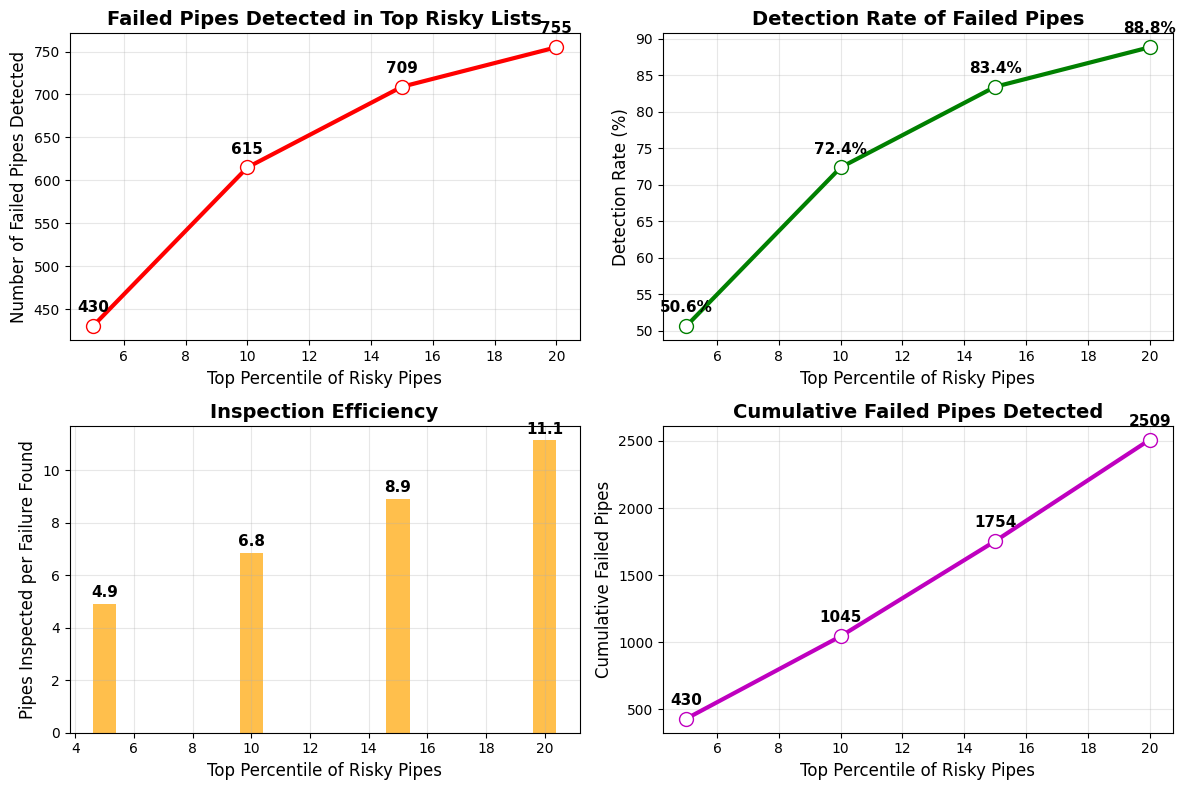

In [92]:
# Create the main validation curve you wanted
plt.figure(figsize=(12, 8))

percentiles = [5, 10, 15, 20]
detected_counts = []
detection_rates = []

for percentile in percentiles:
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    detected_counts.append(len(common_pipes))
    detection_rates.append((len(common_pipes) / total_failed_second) * 100)

# Plot 1: Number of detected failed pipes
plt.subplot(2, 2, 1)
plt.plot(percentiles, detected_counts, 'ro-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Failed Pipes Detected in Top Risky Lists', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Number of Failed Pipes Detected', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, count in zip(percentiles, detected_counts):
    plt.annotate(f'{count}', (p, count), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

# Plot 2: Detection rate
plt.subplot(2, 2, 2)
plt.plot(percentiles, detection_rates, 'go-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Detection Rate of Failed Pipes', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Detection Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, rate in zip(percentiles, detection_rates):
    plt.annotate(f'{rate:.1f}%', (p, rate), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

# Plot 3: Efficiency (pipes inspected per failure found)
efficiency = [int(total_pipes_first * p/100) / count if count > 0 else 0 for p, count in zip(percentiles, detected_counts)]
plt.subplot(2, 2, 3)
plt.bar(percentiles, efficiency, color='orange', alpha=0.7)
plt.title('Inspection Efficiency', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Pipes Inspected per Failure Found', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, eff in zip(percentiles, efficiency):
    if eff > 0:
        plt.annotate(f'{eff:.1f}', (p, eff), textcoords="offset points", xytext=(0,5), 
                     ha='center', fontweight='bold', fontsize=11)

# Plot 4: Cumulative detection
plt.subplot(2, 2, 4)
cumulative_detected = [sum(detected_counts[:i+1]) for i in range(len(detected_counts))]
plt.plot(percentiles, cumulative_detected, 'mo-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Cumulative Failed Pipes Detected', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Cumulative Failed Pipes', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, cumul in zip(percentiles, cumulative_detected):
    plt.annotate(f'{cumul}', (p, cumul), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

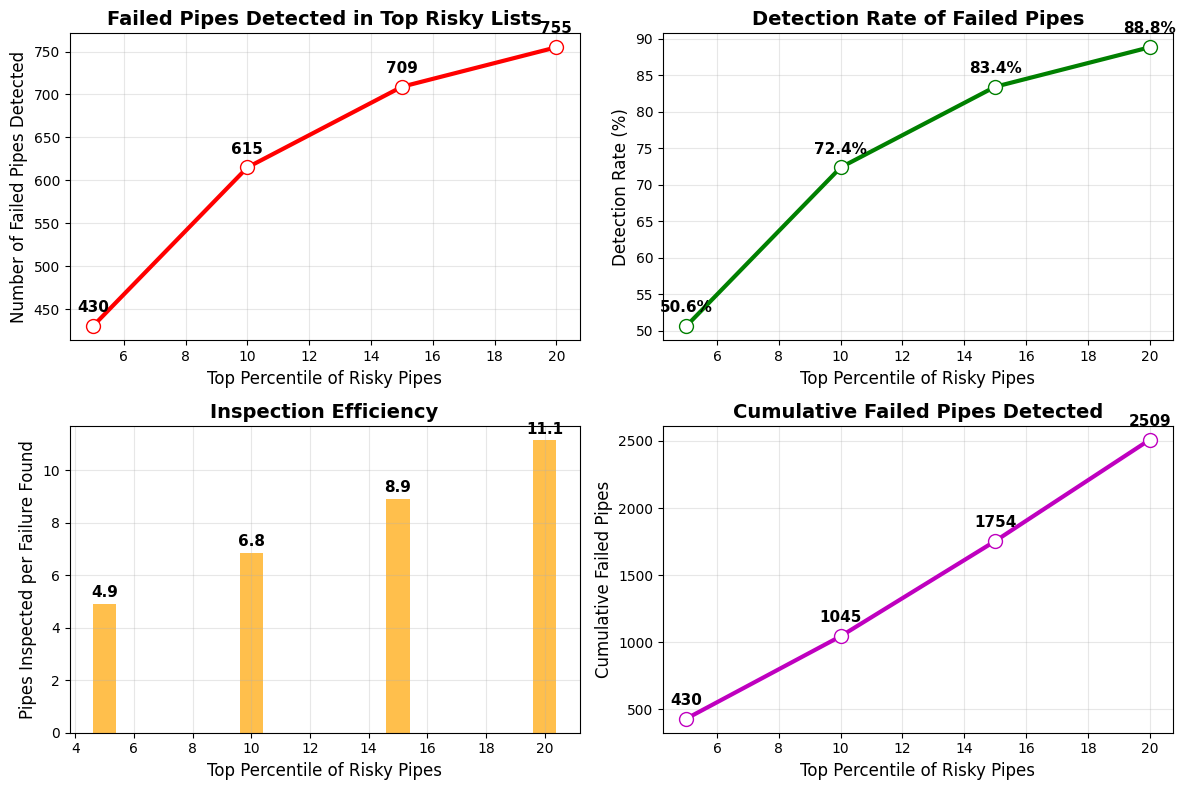

In [93]:
# Create the main validation curve you wanted
plt.figure(figsize=(12, 8))

percentiles = [5, 10, 15, 20]
detected_counts = []
detection_rates = []

for percentile in percentiles:
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    detected_counts.append(len(common_pipes))
    detection_rates.append((len(common_pipes) / total_failed_second) * 100)

# Plot 1: Number of detected failed pipes
plt.subplot(2, 2, 1)
plt.plot(percentiles, detected_counts, 'ro-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Failed Pipes Detected in Top Risky Lists', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Number of Failed Pipes Detected', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, count in zip(percentiles, detected_counts):
    plt.annotate(f'{count}', (p, count), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

# Plot 2: Detection rate
plt.subplot(2, 2, 2)
plt.plot(percentiles, detection_rates, 'go-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Detection Rate of Failed Pipes', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Detection Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, rate in zip(percentiles, detection_rates):
    plt.annotate(f'{rate:.1f}%', (p, rate), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

# Plot 3: Efficiency (pipes inspected per failure found)
efficiency = [int(total_pipes_first * p/100) / count if count > 0 else 0 for p, count in zip(percentiles, detected_counts)]
plt.subplot(2, 2, 3)
plt.bar(percentiles, efficiency, color='orange', alpha=0.7)
plt.title('Inspection Efficiency', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Pipes Inspected per Failure Found', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, eff in zip(percentiles, efficiency):
    if eff > 0:
        plt.annotate(f'{eff:.1f}', (p, eff), textcoords="offset points", xytext=(0,5), 
                     ha='center', fontweight='bold', fontsize=11)

# Plot 4: Cumulative detection
plt.subplot(2, 2, 4)
cumulative_detected = [sum(detected_counts[:i+1]) for i in range(len(detected_counts))]
plt.plot(percentiles, cumulative_detected, 'mo-', linewidth=3, markersize=10, markerfacecolor='white')
plt.title('Cumulative Failed Pipes Detected', fontsize=14, fontweight='bold')
plt.xlabel('Top Percentile of Risky Pipes', fontsize=12)
plt.ylabel('Cumulative Failed Pipes', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for p, cumul in zip(percentiles, cumulative_detected):
    plt.annotate(f'{cumul}', (p, cumul), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

In [95]:
# Create the final answer table
print("\n" + "="*80)
print("FINAL ANSWER: MODEL'S ABILITY TO DETECT THE 850 FAILED PIPES")
print("="*80)

final_results = []
for percentile in [5, 10, 15, 20]:
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    detected_failures = len(common_pipes)
    detection_rate = (detected_failures / total_failed_second) * 100
    precision = (detected_failures / n_top) * 100
    
    final_results.append({
        'Top_Percentile': f'{percentile}%',
        'Pipes_Inspected': n_top,
        'Failed_Pipes_Detected': detected_failures,
        'Detection_Rate': f'{detection_rate:.1f}%',
        'Precision': f'{precision:.1f}%',
        'Efficiency_Ratio': f'1:{n_top/detected_failures:.1f}' if detected_failures > 0 else 'N/A'
    })

final_df = pd.DataFrame(final_results)
print(final_df.to_string(index=False))

print(f"\n🎯 KEY FINDING:")
max_detection = max(detected_counts)
max_percentile = percentiles[detected_counts.index(max_detection)]
print(f"Your model detects {max_detection} out of {total_failed_second} failed pipes")
print(f"Best detection is at Top {max_percentile}% level")
print(f"Maximum detection rate: {max(detection_rates):.1f}%")


FINAL ANSWER: MODEL'S ABILITY TO DETECT THE 850 FAILED PIPES
Top_Percentile  Pipes_Inspected  Failed_Pipes_Detected Detection_Rate Precision Efficiency_Ratio
            5%             2103                    430          50.6%     20.4%            1:4.9
           10%             4206                    615          72.4%     14.6%            1:6.8
           15%             6309                    709          83.4%     11.2%            1:8.9
           20%             8412                    755          88.8%      9.0%           1:11.1

🎯 KEY FINDING:
Your model detects 755 out of 850 failed pipes
Best detection is at Top 20% level
Maximum detection rate: 88.8%


In [96]:
# Save all validation results
print("\n=== SAVING VALIDATION RESULTS ===")

# Save final results
final_df.to_csv('model_detection_validation.csv', index=False)

# Save detailed lists for each percentile
for percentile in [5, 10, 15, 20]:
    n_top = int(total_pipes_first * percentile / 100)
    top_risky_pipes = first_dataset_results.head(n_top)
    top_risky_indices = set(top_risky_pipes['Pipe_Index'])
    
    common_pipes = top_risky_indices.intersection(failed_pipe_indices)
    
    # Create detection list
    detection_list = top_risky_pipes[top_risky_pipes['Pipe_Index'].isin(common_pipes)].copy()
    detection_list['Actually_Failed'] = True
    detection_list['Detection_Percentile'] = f'Top {percentile}%'
    
    detection_list.to_csv(f'detected_failed_pipes_top_{percentile}percent.csv', index=False)

print("✅ All validation results saved!")
print("   - model_detection_validation.csv")
print("   - detected_failed_pipes_top_*percent.csv files")


=== SAVING VALIDATION RESULTS ===
✅ All validation results saved!
   - model_detection_validation.csv
   - detected_failed_pipes_top_*percent.csv files


In [98]:
print("=== CREATING 4 CSV FILES FOR TOP RISKY PIPES ===")

# Define important columns to include
important_columns = [
    'Pipe_Index', 
    'Break_Probability', 
    'Predicted_Failure',
    'InstallYear', 
    'Diameter', 
    'Length', 
    'Material', 
    'Age2018'
]

# Check which columns are available in your dataset
available_columns = [col for col in important_columns if col in df.columns]
print(f"Available important columns: {available_columns}")

# Add risk level categorization
def get_risk_level(probability):
    if probability >= 0.9:
        return "Very High"
    elif probability >= 0.7:
        return "High"
    elif probability >= 0.5:
        return "Medium"
    else:
        return "Low"

# Create CSV files for each percentile
for percentile in [5, 10, 15, 20]:
    print(f"\n📁 Creating CSV for Top {percentile}% Risky Pipes...")
    
    # Calculate number of pipes for this percentile
    n_top = int(total_pipes_first * percentile / 100)
    
    # Get top risky pipes
    top_risky_pipes = first_dataset_results.head(n_top).copy()
    
    # Add detailed information from original dataset
    detailed_info = df.loc[top_risky_pipes['Pipe_Index']].copy()
    
    # Combine risk information with detailed pipe information
    final_list = top_risky_pipes[['Pipe_Index', 'Break_Probability', 'Predicted_Failure']].copy()
    
    # Add important columns
    for col in available_columns:
        if col not in ['Pipe_Index', 'Break_Probability', 'Predicted_Failure']:
            final_list[col] = detailed_info[col].values
    
    # Add risk level
    final_list['Risk_Level'] = final_list['Break_Probability'].apply(get_risk_level)
    
    # Add maintenance priority
    def get_priority(risk_level, probability):
        if risk_level == "Very High":
            return "Immediate Action"
        elif risk_level == "High":
            return "High Priority" 
        elif risk_level == "Medium":
            return "Medium Priority"
        else:
            return "Monitor"
    
    final_list['Maintenance_Priority'] = final_list.apply(
        lambda row: get_priority(row['Risk_Level'], row['Break_Probability']), axis=1
    )
    
    # Add whether this pipe actually failed in second dataset
    final_list['Actually_Failed_In_Future'] = final_list['Pipe_Index'].isin(failed_pipe_indices)
    
    # Sort by risk probability (highest first)
    final_list = final_list.sort_values('Break_Probability', ascending=False)
    
    # Save to CSV
    filename = f'top_{percentile}_percent_risky_pipes.csv'
    final_list.to_csv(filename, index=False)
    
    print(f"✅ Saved: {filename}")
    print(f"   • Total pipes: {len(final_list)}")
    print(f"   • Risk range: {final_list['Break_Probability'].min():.3f} - {final_list['Break_Probability'].max():.3f}")
    print(f"   • Actually failed in future: {final_list['Actually_Failed_In_Future'].sum()} pipes")
    print(f"   • Risk distribution:")
    print(final_list['Risk_Level'].value_counts().to_string())

=== CREATING 4 CSV FILES FOR TOP RISKY PIPES ===
Available important columns: ['InstallYear', 'Diameter', 'Length', 'Material', 'Age2018']

📁 Creating CSV for Top 5% Risky Pipes...
✅ Saved: top_5_percent_risky_pipes.csv
   • Total pipes: 2103
   • Risk range: 0.263 - 0.907
   • Actually failed in future: 430 pipes
   • Risk distribution:
Risk_Level
Low          1628
Medium        379
High           95
Very High       1

📁 Creating CSV for Top 10% Risky Pipes...
✅ Saved: top_10_percent_risky_pipes.csv
   • Total pipes: 4206
   • Risk range: 0.141 - 0.907
   • Actually failed in future: 615 pipes
   • Risk distribution:
Risk_Level
Low          3731
Medium        379
High           95
Very High       1

📁 Creating CSV for Top 15% Risky Pipes...
✅ Saved: top_15_percent_risky_pipes.csv
   • Total pipes: 6309
   • Risk range: 0.065 - 0.907
   • Actually failed in future: 709 pipes
   • Risk distribution:
Risk_Level
Low          5834
Medium        379
High           95
Very High       1

📁 Cr